<h1><center><span style="color:RED">FUTURE SALES PREDICTION</span></center></h1>

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### <center>Presented by :</center>
### <center>Doha Benhabbach</center>
### <center> Belyout Hasna</center>
#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>Dataset Description</h1>
 <h3>The objective is to predict 3 months of year 2018 of item-level sales data at different store locations.</h3>
 <h1>File descriptions</h1>
 <h3>This dataset contains around 913000 entries in the training dataset with each entry depicting the number of items sold at a particular store on daily basis from 2013 to 2017<h3>

Dataset Link:https://www.kaggle.com/competitions/demand-forecasting-kernels-only/data?select=train.csv
     <h3><ins>File descriptions</ins></h3>
   <h4> train.csv - Training data</h4>
    <h4> test.csv - Test data</h4>
    <h3><ins>Data Fields</ins></h3>
<h4>date: Date of the sale data</h4>
<h4>store: Store ID</h4>
<h4>item: Item ID</h4>
       <h4> sales: Number of items sold at a particular store on a particular date</h4>
   

# <span style="color:brown"><ins>Importing all libraries required</ins></span>




In [1]:
# Manipulating the data
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# <span style="color:brown"><ins>Creating dataframes</ins></span>

In [3]:
## Creating DataFrame :
train = pd.read_csv('train.csv', parse_dates=['date'])
test = pd.read_csv('test.csv', parse_dates=['date'])

# Shape of data
print('Train shape:{}, test shape:{}'.format(train.shape, test.shape))

# Showing the first five rows of train data
train.head()

Train shape:(913043, 4), test shape:(45000, 4)


,date,store,item,sales
0,2013-01-02,1,1,11.0
1,2013-01-03,1,1,14.0
2,2013-01-04,1,1,13.0
3,2013-01-05,1,1,10.0
4,2013-01-06,1,1,12.0


In [4]:
# Info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913043 entries, 0 to 913042
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913043 non-null  datetime64[ns]
 1   store   913043 non-null  int64         
 2   item    913043 non-null  int64         
 3   sales   913027 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 27.9 MB


In [5]:
# Number of unique store and item :
print("number of unique items :",train.item.nunique())
print("number of unique store :",train.store.nunique())


number of unique items : 50
number of unique store : 10


# <span style="color:brown"><ins>Data Wrangling / Cleaning </ins></span>

In [6]:
# Shape of train data
print(f'The number of samples : {train.shape[0]}')
print(f'The number of features : {train.shape[1]}')

The number of samples : 913043
The number of features : 4


In [7]:
# Calculate correlation
train.corrwith(train.sales)

store   -0.008103
item    -0.055921
sales    1.000000
dtype: float64

### <span style="color:green"><ins>NOTICE</ins></span>
#### Negative correlation means one variable increases as the other decreases

In [8]:
# Check the null values
train.isnull().sum()

date      0
store     0
item      0
sales    16
dtype: int64

### <span style="color:green"><ins>NOTICE</ins></span>
#### As we can see there are  a little of null values so we can drop it

In [9]:
# Drop null values
train.dropna(inplace=True)

In [10]:
# Check the null values
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [11]:
# Verify that null values has dropped
train

,date,store,item,sales
0,2013-01-02,1,1,11.0
1,2013-01-03,1,1,14.0
2,2013-01-04,1,1,13.0
3,2013-01-05,1,1,10.0
4,2013-01-06,1,1,12.0
...,...,...,...,...
913038,2017-12-27,10,50,63.0
913039,2017-12-28,10,50,59.0
913040,2017-12-29,10,50,74.0
913041,2017-12-30,10,50,62.0


In [12]:
# Check the duplicated values
print(f'The number of duplicate rows : {train.duplicated().sum()}')

The number of duplicate rows : 27


In [13]:
# Getting rid of them
train.drop_duplicates(inplace= True)

In [14]:
# Checking.
print(f'The number of duplicate rows : {train.duplicated().sum()}')

The number of duplicate rows : 0


In [15]:
#Checking the data types
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [16]:
# Showing train data
train

,date,store,item,sales
0,2013-01-02,1,1,11.0
1,2013-01-03,1,1,14.0
2,2013-01-04,1,1,13.0
3,2013-01-05,1,1,10.0
4,2013-01-06,1,1,12.0
...,...,...,...,...
913038,2017-12-27,10,50,63.0
913039,2017-12-28,10,50,59.0
913040,2017-12-29,10,50,74.0
913041,2017-12-30,10,50,62.0


# <span style="color:brown"><ins>Features Engineering</ins></span>

#### We neet to feature the train data into dayofmonth dayof year dayofweek month year weekofyear

In [17]:
#date features :
train['dayofmonth'] = train.date.dt.day
train['dayofyear'] = train.date.dt.dayofyear
train['dayofweek'] = train.date.dt.dayofweek
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year
train['weekofyear'] = train.date.dt.weekofyear
train.head()

C:\Users\user\AppData\Local\Temp\ipykernel_13832\1469107328.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['weekofyear'] = train.date.dt.weekofyear


,date,store,item,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,2013-01-02,1,1,11.0,2,2,2,1,2013,1
1,2013-01-03,1,1,14.0,3,3,3,1,2013,1
2,2013-01-04,1,1,13.0,4,4,4,1,2013,1
3,2013-01-05,1,1,10.0,5,5,5,1,2013,1
4,2013-01-06,1,1,12.0,6,6,6,1,2013,1


In [18]:
# train describe
train.describe()

,store,item,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,15.727820,183.100219,3.001643,6.523549,2015.000548,26.615553
std,2.872283,14.430878,28.801144,8.799329,105.424201,1.999316,3.448535,1.414021,15.060967
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2013.000000,1.000000
25%,3.000000,13.000000,30.000000,8.000000,92.000000,1.000000,4.000000,2014.000000,14.000000
50%,5.500000,25.500000,47.000000,16.000000,183.000000,3.000000,7.000000,2015.000000,27.000000
75%,8.000000,38.000000,70.000000,23.000000,274.000000,5.000000,10.000000,2016.000000,40.000000
max,10.000000,50.000000,231.000000,31.000000,366.000000,6.000000,12.000000,2017.000000,53.000000


# <span style="color:brown"><ins>Visualization</ins></span>

   ## <span style="color:green">Visualize Total sales by month</span>

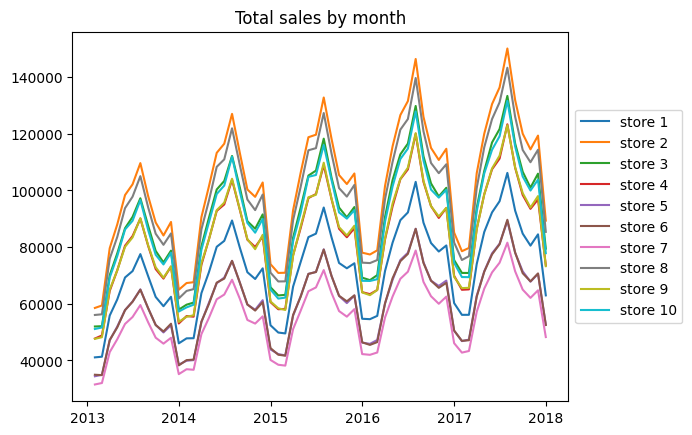

In [19]:
# Create month_df 
# Plot Total sales by month
for i in range(1,11):
    month_df = train[train.store==i].resample('M',on='date').sum()
    x= np.array(month_df.index)
    y=np.array(month_df.sales)
    plt.plot(x,y,label = 'store %s' % i)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Total sales by month")
plt.show()

In [20]:
# Show month_df data
month_df

,store,item,sales,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
date,,,,,,,,,
2013-01-31,15500,39525,51095.0,24800,24800,4500,1550,3120150,4450
2013-02-28,14000,35700,51624.0,20300,63700,4200,2800,2818200,9900
2013-03-31,15500,39525,69249.0,24800,116250,4950,4650,3120150,17450
2013-04-30,15000,38250,76791.0,23250,158250,4250,6000,3019500,23500
2013-05-31,15500,39525,86210.0,24800,210800,4650,7750,3120150,31000
2013-06-30,15000,38250,89289.0,23250,249750,4750,9000,3019500,36500
2013-07-31,15500,39525,96608.0,24800,305350,4350,10850,3120150,44550
2013-08-31,15500,39525,86061.0,24800,353400,4800,12400,3120150,51350
2013-09-30,15000,38250,77291.0,23250,387750,4500,13500,3019500,56250


##  <span style="color:green">Visualize Store by Item</span>

Text(0.5, 1.0, 'Store/ Item sales heatmap')

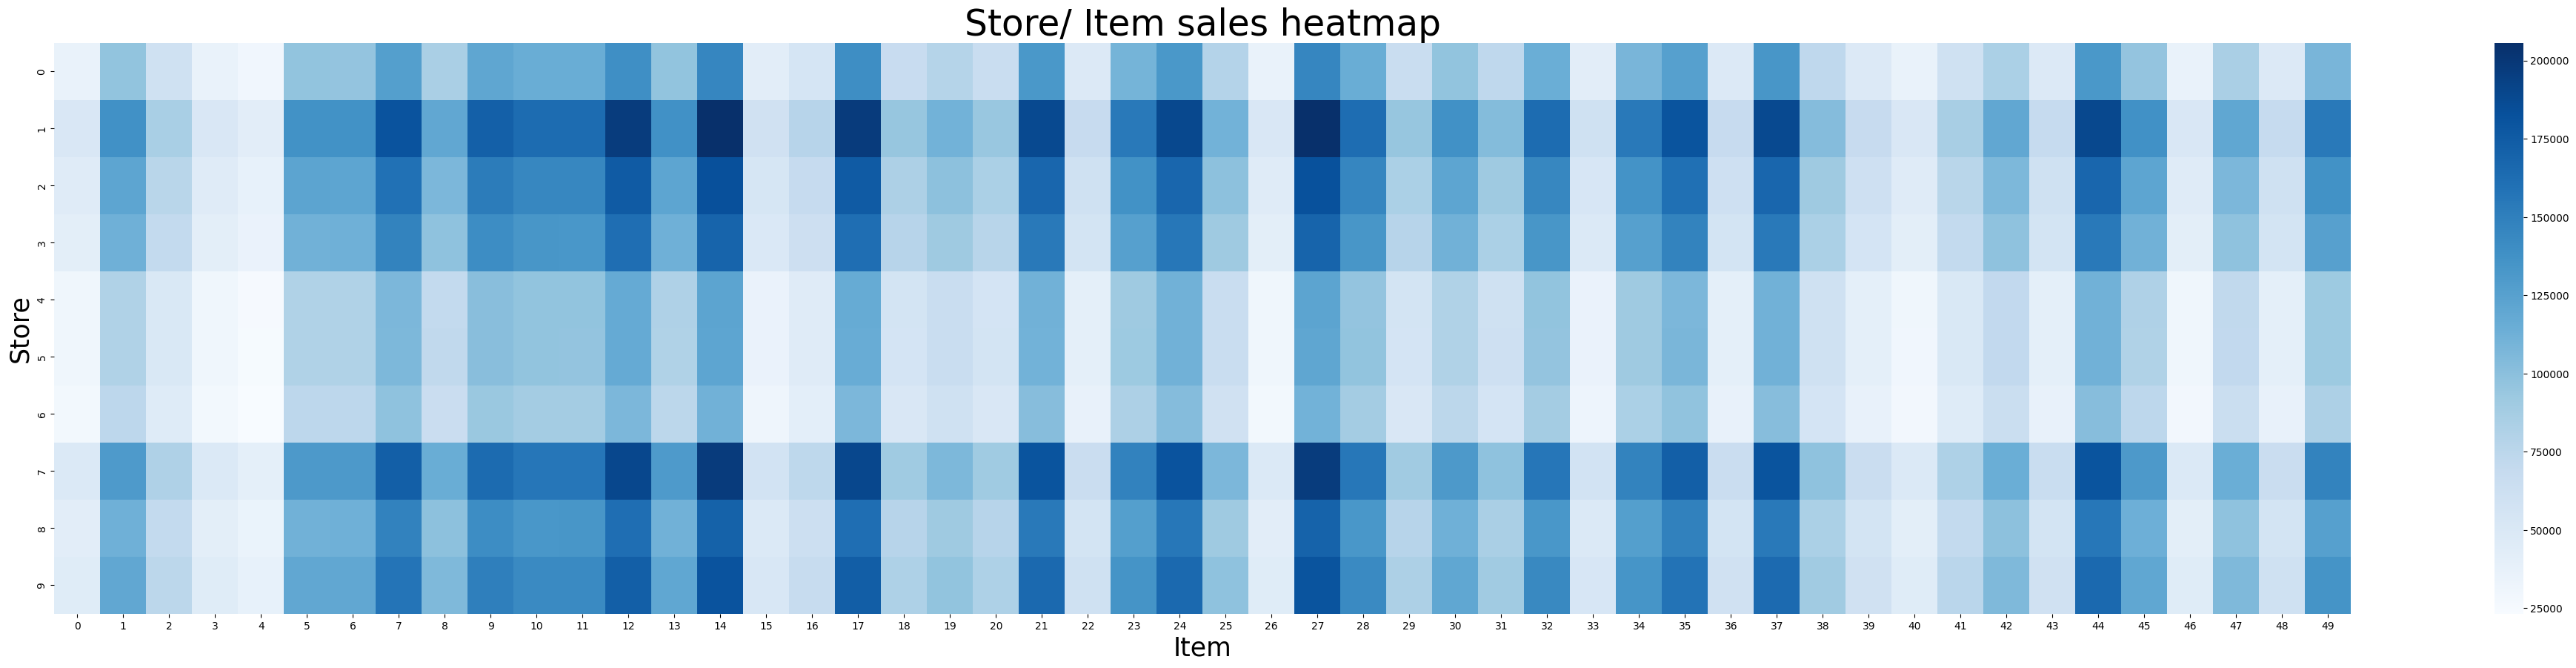

In [21]:
# Create store_item_df from train data grouped by sales and items
store_item_df = train.groupby(['store','item']).sum()
matrixStoreItem = np.zeros((10,50))
for i in range(1,11):
    for j in range(1,51):
        matrixStoreItem[i-1,j-1] = store_item_df.loc[i,j].sales
# Plot Store sales by item sales
plt.figure(figsize=(50,10))
ax = sns.heatmap(matrixStoreItem,cmap='Blues')
plt.xlabel("Item",fontsize = 25)
plt.ylabel("Store",fontsize=25)
plt.title("Store/ Item sales heatmap",fontsize=35)

In [22]:
#Showing the store_item_df data
store_item_df

sales  dayofmonth  dayofyear  dayofweek  month     year  \
store item                                                               
1     1      36468.0       28719     334341       5481  11912  3679391   
      2      97050.0       28719     334341       5481  11912  3679391   
      3      60638.0       28719     334341       5481  11912  3679391   
      4      36440.0       28719     334341       5481  11912  3679391   
      5      30335.0       28719     334341       5481  11912  3679391   
...              ...         ...        ...        ...    ...      ...   
10    46    120601.0       28719     334341       5481  11912  3679391   
      47     45204.0       28719     334341       5481  11912  3679391   
      48    105570.0       28719     334341       5481  11912  3679391   
      49     60317.0       28719     334341       5481  11912  3679391   
      50    135192.0       28719     334341       5481  11912  3679391   

            weekofyear  
store item              
1     1          48600  
      2          48600  
      3          48600  
      4          48600  
      5          48600  
...                ...  
10    46         48600  
      47         48600  
      48         48600  
      49         48600  
      50         48600  

[500 rows x 7 columns]

## <span style="color:green"> Visualize mean sales by item</span>

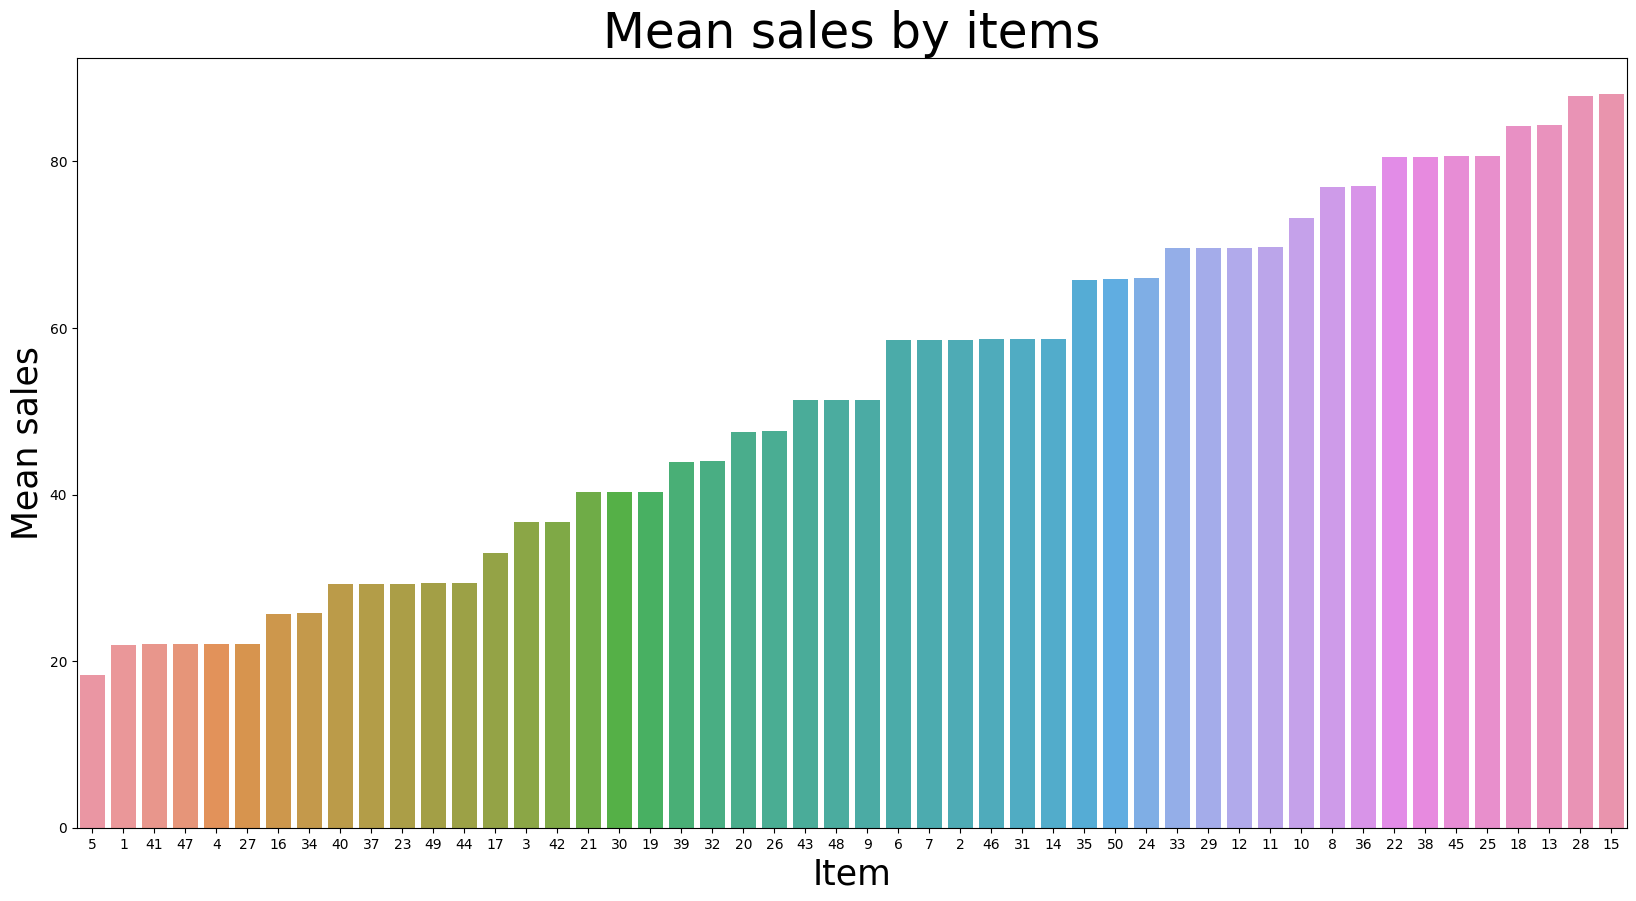

In [23]:
# Create store_item_df from train data grouped by mean items
item_df = train.groupby(['item']).mean()
item_df.sort_values('sales',ascending=True,inplace=True)
x = item_df.index
y = item_df.sales
# Plot mean sales by items
plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, order=x)
plt.xlabel("Item",fontsize = 25)
plt.ylabel("Mean sales",fontsize=25)
plt.title("Mean sales by items",fontsize=35)
plt.show()

## <span style="color:green"> Visualize Sales by days</span>

In [24]:
# plotting a box plot for itemprice and item-cnt-day
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(data=df_sales_pred,x = df_sales_pred['dayofmonth'], y = df_sales_pred['sales'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('dayofmonth', fontsize = 15)
plt.ylabel('sales', fontsize = 15)
plt.show()

NameError: name 'df_sales_pred' is not defined

# <span style="color:brown"><ins> Splitting the cleaned data </ins></span>
#### Splitting the cleaned data into two sets - a training set and a testing set. The training set is the set your model learns from. A testing set is used to check the accuracy of the model after training

In [25]:
# dummies features 
# now let's create the actual training data
df = pd.get_dummies(train, columns = ['store','item','dayofmonth','dayofweek','month','weekofyear'])
df.head()

,date,sales,dayofyear,year,store_1,store_2,store_3,store_4,store_5,store_6,...,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,2013-01-02,11.0,2,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-03,14.0,3,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-04,13.0,4,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-05,10.0,5,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-06,12.0,6,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Describe df data
df.describe()

,sales,dayofyear,year,store_1,store_2,store_3,store_4,store_5,store_6,store_7,...,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
count,913000.000000,913000.000000,913000.000000,913000.0,913000.0,913000.0,913000.0,913000.0,913000.0,913000.0,...,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,52.250287,183.100219,2015.000548,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.019168,0.019168,0.019168,0.019168,0.019168,0.019168,0.019168,0.019168,0.019168,0.003834
std,28.801144,105.424201,1.414021,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.137114,0.137114,0.137114,0.137114,0.137114,0.137114,0.137114,0.137114,0.137114,0.061797
min,0.000000,1.000000,2013.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,92.000000,2014.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,183.000000,2015.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,274.000000,2016.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,231.000000,366.000000,2017.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#train and validation dataframe :
train_validation = np.random.rand(len(df)) < 0.8
# splitting the data into train(70%) and valid dataset(30%)
df_train = df[train_validation]
df_val = df[~train_validation]
# checking the shapes of the datasets
print("train shape: ",df_train.shape)
print("validation shape :",df_val.shape)

train shape:  (729827, 167)
validation shape : (183173, 167)


In [28]:
# let's check df_train data
df_train

,date,sales,dayofyear,year,store_1,store_2,store_3,store_4,store_5,store_6,...,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
0,2013-01-02,11.0,2,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-01-03,14.0,3,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-01-04,13.0,4,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-01-05,10.0,5,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-01-06,12.0,6,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913036,2017-12-25,51.0,359,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
913037,2017-12-26,41.0,360,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
913038,2017-12-27,63.0,361,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
913039,2017-12-28,59.0,362,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# let's check df_val data
df_val

,date,sales,dayofyear,year,store_1,store_2,store_3,store_4,store_5,store_6,...,weekofyear_44,weekofyear_45,weekofyear_46,weekofyear_47,weekofyear_48,weekofyear_49,weekofyear_50,weekofyear_51,weekofyear_52,weekofyear_53
10,2013-01-12,7.0,12,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,2013-01-19,18.0,19,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,2013-02-03,15.0,34,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,2013-02-07,13.0,38,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,2013-02-14,10.0,45,2013,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913017,2017-12-06,60.0,340,2017,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
913026,2017-12-15,72.0,349,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
913035,2017-12-24,76.0,358,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
913041,2017-12-30,62.0,364,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# drop date column
df_train.drop('date',axis=1,inplace=True)
df_val.drop('date',axis=1,inplace=True)
# Create x_train x_test y_train y_test
y_train = df_train['sales'].values
y_test = df_val['sales'].values
X_train = df_train.drop('sales', axis=1).values
X_test = df_val.drop('sales', axis=1).values

C:\Users\user\AppData\Local\Temp\ipykernel_13832\1648676664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('date',axis=1,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13832\1648676664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop('date',axis=1,inplace=True)


In [31]:
# let's check X_train
X_train

array([[   2, 2013,    1, ...,    0,    0,    0],
       [   3, 2013,    1, ...,    0,    0,    0],
       [   4, 2013,    1, ...,    0,    0,    0],
       ...,
       [ 361, 2017,    0, ...,    0,    1,    0],
       [ 362, 2017,    0, ...,    0,    1,    0],
       [ 363, 2017,    0, ...,    0,    1,    0]], dtype=int64)

In [32]:
# let's check y_train
y_train

array([11., 14., 13., ..., 63., 59., 74.])

In [33]:
# let's check y_test
y_test

array([ 7., 18., 15., ..., 76., 62., 82.])

In [34]:
# let's check X_test
X_test

array([[  12, 2013,    1, ...,    0,    0,    0],
       [  19, 2013,    1, ...,    0,    0,    0],
       [  34, 2013,    1, ...,    0,    0,    0],
       ...,
       [ 358, 2017,    0, ...,    1,    0,    0],
       [ 364, 2017,    0, ...,    0,    1,    0],
       [ 365, 2017,    0, ...,    0,    1,    0]], dtype=int64)

# <span style="color:brown"><ins>Choosing and Training the Model</ins></span>
### For Modeling we decided to choose the lightgbm algorithm  because of Faster training speed ,higher efficiency. and Lower memory usage.
### Training is the most important step in machine learning. In training, we pass the prepared data to our machine learning model to find patterns and make predictions.

In [ ]:
# Installing lightgbm package
pip install lightgbm

In [41]:
# Importing necessary package for modeling
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
# MODELING
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {'task':'train', 'boosting_type':'gbdt', 'objective':'regression', 
               'num_leaves': 10, 'learning_rate': 0.05, 
              'feature_fraction': 0.8, 'max_depth': 5, 'verbose': 0, 
              'num_boost_round':15000, 'early_stopping_rounds':100, 'nthread':-1}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

 #predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
 #eval by calculate rmse
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred)) 



#** 0.5

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 28.4848
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 28.27
[3]	valid_0's rmse: 28.0536
[4]	valid_0's rmse: 27.8515
[5]	valid_0's rmse: 27.6445
[6]	valid_0's rmse: 27.4581
[7]	valid_0's rmse: 27.2761
[8]	valid_0's rmse: 27.0951
[9]	valid_0's rmse: 26.9335
[10]	valid_0's rmse: 26.7528
[11]	valid_0's rmse: 26.6047
[12]	valid_0's rmse: 26.4557
[13]	valid_0's rmse: 26.2893
[14]	valid_0's rmse: 26.1257
[15]	valid_0's rmse: 25.9545
[16]	valid_0's rmse: 25.787
[17]	valid_0's rmse: 25.6528
[18]	valid_0's rmse: 25.4878
[19]	valid_0's rmse: 25.3432
[20]	valid_0's rmse: 25.1929
[21]	valid_0's rmse: 25.0533
[22]	valid_0's rmse: 24.902
[23]	valid_0's rmse: 24.7808
[24]	valid_0's rmse: 24.6404
[25]	valid_0's rmse: 24.49

[273]	valid_0's rmse: 11.1892
[274]	valid_0's rmse: 11.173
[275]	valid_0's rmse: 11.1565
[276]	valid_0's rmse: 11.1387
[277]	valid_0's rmse: 11.1227
[278]	valid_0's rmse: 11.1053
[279]	valid_0's rmse: 11.09
[280]	valid_0's rmse: 11.0727
[281]	valid_0's rmse: 11.0571
[282]	valid_0's rmse: 11.0414
[283]	valid_0's rmse: 11.0205
[284]	valid_0's rmse: 11.006
[285]	valid_0's rmse: 10.9888
[286]	valid_0's rmse: 10.9721
[287]	valid_0's rmse: 10.9556
[288]	valid_0's rmse: 10.9397
[289]	valid_0's rmse: 10.9252
[290]	valid_0's rmse: 10.9108
[291]	valid_0's rmse: 10.8955
[292]	valid_0's rmse: 10.8805
[293]	valid_0's rmse: 10.8669
[294]	valid_0's rmse: 10.8512
[295]	valid_0's rmse: 10.8362
[296]	valid_0's rmse: 10.821
[297]	valid_0's rmse: 10.8061
[298]	valid_0's rmse: 10.7929
[299]	valid_0's rmse: 10.7801
[300]	valid_0's rmse: 10.7651
[301]	valid_0's rmse: 10.7512
[302]	valid_0's rmse: 10.7371
[303]	valid_0's rmse: 10.7224
[304]	valid_0's rmse: 10.7092
[305]	valid_0's rmse: 10.696
[306]	valid_0's 

[551]	valid_0's rmse: 9.03055
[552]	valid_0's rmse: 9.02749
[553]	valid_0's rmse: 9.02472
[554]	valid_0's rmse: 9.02191
[555]	valid_0's rmse: 9.01946
[556]	valid_0's rmse: 9.01757
[557]	valid_0's rmse: 9.01504
[558]	valid_0's rmse: 9.01237
[559]	valid_0's rmse: 9.00964
[560]	valid_0's rmse: 9.00686
[561]	valid_0's rmse: 9.00409
[562]	valid_0's rmse: 9.00116
[563]	valid_0's rmse: 8.99863
[564]	valid_0's rmse: 8.99588
[565]	valid_0's rmse: 8.99294
[566]	valid_0's rmse: 8.99061
[567]	valid_0's rmse: 8.98824
[568]	valid_0's rmse: 8.98537
[569]	valid_0's rmse: 8.98253
[570]	valid_0's rmse: 8.97984
[571]	valid_0's rmse: 8.97708
[572]	valid_0's rmse: 8.97475
[573]	valid_0's rmse: 8.97185
[574]	valid_0's rmse: 8.96936
[575]	valid_0's rmse: 8.96718
[576]	valid_0's rmse: 8.96486
[577]	valid_0's rmse: 8.96229
[578]	valid_0's rmse: 8.95979
[579]	valid_0's rmse: 8.95738
[580]	valid_0's rmse: 8.95523
[581]	valid_0's rmse: 8.95308
[582]	valid_0's rmse: 8.95088
[583]	valid_0's rmse: 8.94897
[584]	vali

[836]	valid_0's rmse: 8.55323
[837]	valid_0's rmse: 8.5526
[838]	valid_0's rmse: 8.55192
[839]	valid_0's rmse: 8.55097
[840]	valid_0's rmse: 8.54987
[841]	valid_0's rmse: 8.54906
[842]	valid_0's rmse: 8.54783
[843]	valid_0's rmse: 8.54667
[844]	valid_0's rmse: 8.54558
[845]	valid_0's rmse: 8.54464
[846]	valid_0's rmse: 8.54382
[847]	valid_0's rmse: 8.54292
[848]	valid_0's rmse: 8.54202
[849]	valid_0's rmse: 8.54097
[850]	valid_0's rmse: 8.54015
[851]	valid_0's rmse: 8.53938
[852]	valid_0's rmse: 8.53858
[853]	valid_0's rmse: 8.53745
[854]	valid_0's rmse: 8.53621
[855]	valid_0's rmse: 8.53523
[856]	valid_0's rmse: 8.53444
[857]	valid_0's rmse: 8.53332
[858]	valid_0's rmse: 8.53252
[859]	valid_0's rmse: 8.53181
[860]	valid_0's rmse: 8.53086
[861]	valid_0's rmse: 8.5292
[862]	valid_0's rmse: 8.5282
[863]	valid_0's rmse: 8.52768
[864]	valid_0's rmse: 8.52628
[865]	valid_0's rmse: 8.52555
[866]	valid_0's rmse: 8.52496
[867]	valid_0's rmse: 8.52404
[868]	valid_0's rmse: 8.52331
[869]	valid_0

[1109]	valid_0's rmse: 8.3274
[1110]	valid_0's rmse: 8.32657
[1111]	valid_0's rmse: 8.32604
[1112]	valid_0's rmse: 8.32533
[1113]	valid_0's rmse: 8.32462
[1114]	valid_0's rmse: 8.32342
[1115]	valid_0's rmse: 8.32274
[1116]	valid_0's rmse: 8.32177
[1117]	valid_0's rmse: 8.32116
[1118]	valid_0's rmse: 8.32046
[1119]	valid_0's rmse: 8.31992
[1120]	valid_0's rmse: 8.31924
[1121]	valid_0's rmse: 8.31898
[1122]	valid_0's rmse: 8.3182
[1123]	valid_0's rmse: 8.31794
[1124]	valid_0's rmse: 8.31763
[1125]	valid_0's rmse: 8.31708
[1126]	valid_0's rmse: 8.31641
[1127]	valid_0's rmse: 8.3158
[1128]	valid_0's rmse: 8.31468
[1129]	valid_0's rmse: 8.31409
[1130]	valid_0's rmse: 8.3134
[1131]	valid_0's rmse: 8.31291
[1132]	valid_0's rmse: 8.31209
[1133]	valid_0's rmse: 8.31135
[1134]	valid_0's rmse: 8.3107
[1135]	valid_0's rmse: 8.30983
[1136]	valid_0's rmse: 8.30912
[1137]	valid_0's rmse: 8.30837
[1138]	valid_0's rmse: 8.30771
[1139]	valid_0's rmse: 8.30751
[1140]	valid_0's rmse: 8.30627
[1141]	valid_

[1385]	valid_0's rmse: 8.16376
[1386]	valid_0's rmse: 8.16336
[1387]	valid_0's rmse: 8.16323
[1388]	valid_0's rmse: 8.16284
[1389]	valid_0's rmse: 8.16232
[1390]	valid_0's rmse: 8.16165
[1391]	valid_0's rmse: 8.16114
[1392]	valid_0's rmse: 8.16088
[1393]	valid_0's rmse: 8.16049
[1394]	valid_0's rmse: 8.16024
[1395]	valid_0's rmse: 8.15995
[1396]	valid_0's rmse: 8.15936
[1397]	valid_0's rmse: 8.15858
[1398]	valid_0's rmse: 8.15829
[1399]	valid_0's rmse: 8.15768
[1400]	valid_0's rmse: 8.15704
[1401]	valid_0's rmse: 8.15691
[1402]	valid_0's rmse: 8.15682
[1403]	valid_0's rmse: 8.15641
[1404]	valid_0's rmse: 8.15588
[1405]	valid_0's rmse: 8.15559
[1406]	valid_0's rmse: 8.15523
[1407]	valid_0's rmse: 8.1547
[1408]	valid_0's rmse: 8.15381
[1409]	valid_0's rmse: 8.15324
[1410]	valid_0's rmse: 8.15222
[1411]	valid_0's rmse: 8.15167
[1412]	valid_0's rmse: 8.15105
[1413]	valid_0's rmse: 8.15045
[1414]	valid_0's rmse: 8.14931
[1415]	valid_0's rmse: 8.1491
[1416]	valid_0's rmse: 8.14856
[1417]	val

[1661]	valid_0's rmse: 8.04474
[1662]	valid_0's rmse: 8.04418
[1663]	valid_0's rmse: 8.04377
[1664]	valid_0's rmse: 8.0432
[1665]	valid_0's rmse: 8.04303
[1666]	valid_0's rmse: 8.04297
[1667]	valid_0's rmse: 8.04291
[1668]	valid_0's rmse: 8.04248
[1669]	valid_0's rmse: 8.04201
[1670]	valid_0's rmse: 8.04185
[1671]	valid_0's rmse: 8.04149
[1672]	valid_0's rmse: 8.04093
[1673]	valid_0's rmse: 8.04067
[1674]	valid_0's rmse: 8.04015
[1675]	valid_0's rmse: 8.03978
[1676]	valid_0's rmse: 8.03923
[1677]	valid_0's rmse: 8.03874
[1678]	valid_0's rmse: 8.03862
[1679]	valid_0's rmse: 8.03825
[1680]	valid_0's rmse: 8.03805
[1681]	valid_0's rmse: 8.03749
[1682]	valid_0's rmse: 8.03732
[1683]	valid_0's rmse: 8.03672
[1684]	valid_0's rmse: 8.03618
[1685]	valid_0's rmse: 8.03601
[1686]	valid_0's rmse: 8.03579
[1687]	valid_0's rmse: 8.03559
[1688]	valid_0's rmse: 8.03514
[1689]	valid_0's rmse: 8.03482
[1690]	valid_0's rmse: 8.03415
[1691]	valid_0's rmse: 8.03374
[1692]	valid_0's rmse: 8.03283
[1693]	va

[1932]	valid_0's rmse: 7.95869
[1933]	valid_0's rmse: 7.95853
[1934]	valid_0's rmse: 7.95849
[1935]	valid_0's rmse: 7.95809
[1936]	valid_0's rmse: 7.95739
[1937]	valid_0's rmse: 7.95722
[1938]	valid_0's rmse: 7.95679
[1939]	valid_0's rmse: 7.9567
[1940]	valid_0's rmse: 7.95667
[1941]	valid_0's rmse: 7.95649
[1942]	valid_0's rmse: 7.95644
[1943]	valid_0's rmse: 7.95612
[1944]	valid_0's rmse: 7.95592
[1945]	valid_0's rmse: 7.95573
[1946]	valid_0's rmse: 7.95548
[1947]	valid_0's rmse: 7.95536
[1948]	valid_0's rmse: 7.95492
[1949]	valid_0's rmse: 7.9549
[1950]	valid_0's rmse: 7.95455
[1951]	valid_0's rmse: 7.95443
[1952]	valid_0's rmse: 7.95413
[1953]	valid_0's rmse: 7.95404
[1954]	valid_0's rmse: 7.95373
[1955]	valid_0's rmse: 7.95371
[1956]	valid_0's rmse: 7.95319
[1957]	valid_0's rmse: 7.95282
[1958]	valid_0's rmse: 7.95229
[1959]	valid_0's rmse: 7.95215
[1960]	valid_0's rmse: 7.95169
[1961]	valid_0's rmse: 7.95152
[1962]	valid_0's rmse: 7.95119
[1963]	valid_0's rmse: 7.95085
[1964]	val

[2205]	valid_0's rmse: 7.88823
[2206]	valid_0's rmse: 7.88811
[2207]	valid_0's rmse: 7.88765
[2208]	valid_0's rmse: 7.88714
[2209]	valid_0's rmse: 7.8867
[2210]	valid_0's rmse: 7.88659
[2211]	valid_0's rmse: 7.88649
[2212]	valid_0's rmse: 7.88601
[2213]	valid_0's rmse: 7.88569
[2214]	valid_0's rmse: 7.88566
[2215]	valid_0's rmse: 7.88552
[2216]	valid_0's rmse: 7.88545
[2217]	valid_0's rmse: 7.88517
[2218]	valid_0's rmse: 7.8851
[2219]	valid_0's rmse: 7.88449
[2220]	valid_0's rmse: 7.88374
[2221]	valid_0's rmse: 7.88365
[2222]	valid_0's rmse: 7.88321
[2223]	valid_0's rmse: 7.88319
[2224]	valid_0's rmse: 7.88315
[2225]	valid_0's rmse: 7.88312
[2226]	valid_0's rmse: 7.88254
[2227]	valid_0's rmse: 7.88192
[2228]	valid_0's rmse: 7.88171
[2229]	valid_0's rmse: 7.8815
[2230]	valid_0's rmse: 7.88121
[2231]	valid_0's rmse: 7.88077
[2232]	valid_0's rmse: 7.88056
[2233]	valid_0's rmse: 7.88001
[2234]	valid_0's rmse: 7.87966
[2235]	valid_0's rmse: 7.87955
[2236]	valid_0's rmse: 7.87931
[2237]	vali

[2474]	valid_0's rmse: 7.81256
[2475]	valid_0's rmse: 7.81255
[2476]	valid_0's rmse: 7.81252
[2477]	valid_0's rmse: 7.81249
[2478]	valid_0's rmse: 7.81214
[2479]	valid_0's rmse: 7.81183
[2480]	valid_0's rmse: 7.81135
[2481]	valid_0's rmse: 7.81092
[2482]	valid_0's rmse: 7.81058
[2483]	valid_0's rmse: 7.81012
[2484]	valid_0's rmse: 7.80974
[2485]	valid_0's rmse: 7.80934
[2486]	valid_0's rmse: 7.80904
[2487]	valid_0's rmse: 7.80901
[2488]	valid_0's rmse: 7.80893
[2489]	valid_0's rmse: 7.80893
[2490]	valid_0's rmse: 7.80885
[2491]	valid_0's rmse: 7.80857
[2492]	valid_0's rmse: 7.80842
[2493]	valid_0's rmse: 7.80815
[2494]	valid_0's rmse: 7.80791
[2495]	valid_0's rmse: 7.80781
[2496]	valid_0's rmse: 7.80757
[2497]	valid_0's rmse: 7.80696
[2498]	valid_0's rmse: 7.80663
[2499]	valid_0's rmse: 7.80647
[2500]	valid_0's rmse: 7.80591
[2501]	valid_0's rmse: 7.80522
[2502]	valid_0's rmse: 7.80452
[2503]	valid_0's rmse: 7.8045
[2504]	valid_0's rmse: 7.80447
[2505]	valid_0's rmse: 7.80415
[2506]	va

[2752]	valid_0's rmse: 7.75471
[2753]	valid_0's rmse: 7.75432
[2754]	valid_0's rmse: 7.75408
[2755]	valid_0's rmse: 7.75366
[2756]	valid_0's rmse: 7.7533
[2757]	valid_0's rmse: 7.75301
[2758]	valid_0's rmse: 7.75299
[2759]	valid_0's rmse: 7.75298
[2760]	valid_0's rmse: 7.75267
[2761]	valid_0's rmse: 7.75241
[2762]	valid_0's rmse: 7.75189
[2763]	valid_0's rmse: 7.75185
[2764]	valid_0's rmse: 7.75178
[2765]	valid_0's rmse: 7.75139
[2766]	valid_0's rmse: 7.75099
[2767]	valid_0's rmse: 7.75062
[2768]	valid_0's rmse: 7.75033
[2769]	valid_0's rmse: 7.75002
[2770]	valid_0's rmse: 7.74972
[2771]	valid_0's rmse: 7.74944
[2772]	valid_0's rmse: 7.74907
[2773]	valid_0's rmse: 7.74842
[2774]	valid_0's rmse: 7.74832
[2775]	valid_0's rmse: 7.7483
[2776]	valid_0's rmse: 7.74827
[2777]	valid_0's rmse: 7.74801
[2778]	valid_0's rmse: 7.74775
[2779]	valid_0's rmse: 7.74773
[2780]	valid_0's rmse: 7.74751
[2781]	valid_0's rmse: 7.74743
[2782]	valid_0's rmse: 7.74717
[2783]	valid_0's rmse: 7.74714
[2784]	val

[3026]	valid_0's rmse: 7.71563
[3027]	valid_0's rmse: 7.71558
[3028]	valid_0's rmse: 7.71557
[3029]	valid_0's rmse: 7.71553
[3030]	valid_0's rmse: 7.71552
[3031]	valid_0's rmse: 7.7155
[3032]	valid_0's rmse: 7.71548
[3033]	valid_0's rmse: 7.71545
[3034]	valid_0's rmse: 7.71537
[3035]	valid_0's rmse: 7.71533
[3036]	valid_0's rmse: 7.71529
[3037]	valid_0's rmse: 7.71522
[3038]	valid_0's rmse: 7.715
[3039]	valid_0's rmse: 7.71454
[3040]	valid_0's rmse: 7.71432
[3041]	valid_0's rmse: 7.71395
[3042]	valid_0's rmse: 7.71365
[3043]	valid_0's rmse: 7.71315
[3044]	valid_0's rmse: 7.71269
[3045]	valid_0's rmse: 7.71231
[3046]	valid_0's rmse: 7.71196
[3047]	valid_0's rmse: 7.71159
[3048]	valid_0's rmse: 7.71135
[3049]	valid_0's rmse: 7.71093
[3050]	valid_0's rmse: 7.71091
[3051]	valid_0's rmse: 7.71063
[3052]	valid_0's rmse: 7.71036
[3053]	valid_0's rmse: 7.71031
[3054]	valid_0's rmse: 7.71006
[3055]	valid_0's rmse: 7.71005
[3056]	valid_0's rmse: 7.70993
[3057]	valid_0's rmse: 7.70968
[3058]	vali

[3301]	valid_0's rmse: 7.645
[3302]	valid_0's rmse: 7.64485
[3303]	valid_0's rmse: 7.64445
[3304]	valid_0's rmse: 7.64414
[3305]	valid_0's rmse: 7.64392
[3306]	valid_0's rmse: 7.64371
[3307]	valid_0's rmse: 7.64351
[3308]	valid_0's rmse: 7.64333
[3309]	valid_0's rmse: 7.64318
[3310]	valid_0's rmse: 7.6429
[3311]	valid_0's rmse: 7.64257
[3312]	valid_0's rmse: 7.6423
[3313]	valid_0's rmse: 7.64205
[3314]	valid_0's rmse: 7.642
[3315]	valid_0's rmse: 7.64181
[3316]	valid_0's rmse: 7.64162
[3317]	valid_0's rmse: 7.64122
[3318]	valid_0's rmse: 7.64102
[3319]	valid_0's rmse: 7.64079
[3320]	valid_0's rmse: 7.64055
[3321]	valid_0's rmse: 7.64026
[3322]	valid_0's rmse: 7.64004
[3323]	valid_0's rmse: 7.63982
[3324]	valid_0's rmse: 7.63964
[3325]	valid_0's rmse: 7.63944
[3326]	valid_0's rmse: 7.63927
[3327]	valid_0's rmse: 7.63906
[3328]	valid_0's rmse: 7.63881
[3329]	valid_0's rmse: 7.63841
[3330]	valid_0's rmse: 7.63819
[3331]	valid_0's rmse: 7.63782
[3332]	valid_0's rmse: 7.63747
[3333]	valid_0

[3570]	valid_0's rmse: 7.58992
[3571]	valid_0's rmse: 7.58992
[3572]	valid_0's rmse: 7.58973
[3573]	valid_0's rmse: 7.5897
[3574]	valid_0's rmse: 7.58954
[3575]	valid_0's rmse: 7.58931
[3576]	valid_0's rmse: 7.58911
[3577]	valid_0's rmse: 7.58894
[3578]	valid_0's rmse: 7.58874
[3579]	valid_0's rmse: 7.5885
[3580]	valid_0's rmse: 7.58832
[3581]	valid_0's rmse: 7.58815
[3582]	valid_0's rmse: 7.58794
[3583]	valid_0's rmse: 7.58768
[3584]	valid_0's rmse: 7.58754
[3585]	valid_0's rmse: 7.58726
[3586]	valid_0's rmse: 7.58714
[3587]	valid_0's rmse: 7.58688
[3588]	valid_0's rmse: 7.58675
[3589]	valid_0's rmse: 7.58659
[3590]	valid_0's rmse: 7.58649
[3591]	valid_0's rmse: 7.5863
[3592]	valid_0's rmse: 7.58623
[3593]	valid_0's rmse: 7.58603
[3594]	valid_0's rmse: 7.58586
[3595]	valid_0's rmse: 7.58584
[3596]	valid_0's rmse: 7.58562
[3597]	valid_0's rmse: 7.58543
[3598]	valid_0's rmse: 7.58529
[3599]	valid_0's rmse: 7.58506
[3600]	valid_0's rmse: 7.58488
[3601]	valid_0's rmse: 7.58467
[3602]	vali

[3840]	valid_0's rmse: 7.5448
[3841]	valid_0's rmse: 7.54469
[3842]	valid_0's rmse: 7.54451
[3843]	valid_0's rmse: 7.5443
[3844]	valid_0's rmse: 7.54409
[3845]	valid_0's rmse: 7.54383
[3846]	valid_0's rmse: 7.54363
[3847]	valid_0's rmse: 7.54346
[3848]	valid_0's rmse: 7.5434
[3849]	valid_0's rmse: 7.54328
[3850]	valid_0's rmse: 7.54307
[3851]	valid_0's rmse: 7.54292
[3852]	valid_0's rmse: 7.5428
[3853]	valid_0's rmse: 7.54264
[3854]	valid_0's rmse: 7.5425
[3855]	valid_0's rmse: 7.54221
[3856]	valid_0's rmse: 7.54205
[3857]	valid_0's rmse: 7.54187
[3858]	valid_0's rmse: 7.5417
[3859]	valid_0's rmse: 7.54165
[3860]	valid_0's rmse: 7.54146
[3861]	valid_0's rmse: 7.54132
[3862]	valid_0's rmse: 7.54117
[3863]	valid_0's rmse: 7.54104
[3864]	valid_0's rmse: 7.54081
[3865]	valid_0's rmse: 7.54069
[3866]	valid_0's rmse: 7.54055
[3867]	valid_0's rmse: 7.54039
[3868]	valid_0's rmse: 7.54025
[3869]	valid_0's rmse: 7.5401
[3870]	valid_0's rmse: 7.53992
[3871]	valid_0's rmse: 7.53973
[3872]	valid_0'

[4111]	valid_0's rmse: 7.51204
[4112]	valid_0's rmse: 7.51185
[4113]	valid_0's rmse: 7.51173
[4114]	valid_0's rmse: 7.51165
[4115]	valid_0's rmse: 7.51154
[4116]	valid_0's rmse: 7.51139
[4117]	valid_0's rmse: 7.51139
[4118]	valid_0's rmse: 7.51129
[4119]	valid_0's rmse: 7.51128
[4120]	valid_0's rmse: 7.51113
[4121]	valid_0's rmse: 7.51101
[4122]	valid_0's rmse: 7.51086
[4123]	valid_0's rmse: 7.5107
[4124]	valid_0's rmse: 7.51051
[4125]	valid_0's rmse: 7.51046
[4126]	valid_0's rmse: 7.51032
[4127]	valid_0's rmse: 7.5102
[4128]	valid_0's rmse: 7.51006
[4129]	valid_0's rmse: 7.50989
[4130]	valid_0's rmse: 7.50982
[4131]	valid_0's rmse: 7.50968
[4132]	valid_0's rmse: 7.50955
[4133]	valid_0's rmse: 7.50937
[4134]	valid_0's rmse: 7.50928
[4135]	valid_0's rmse: 7.50913
[4136]	valid_0's rmse: 7.50902
[4137]	valid_0's rmse: 7.50899
[4138]	valid_0's rmse: 7.50886
[4139]	valid_0's rmse: 7.50879
[4140]	valid_0's rmse: 7.50862
[4141]	valid_0's rmse: 7.50851
[4142]	valid_0's rmse: 7.50841
[4143]	val

[4386]	valid_0's rmse: 7.4832
[4387]	valid_0's rmse: 7.48297
[4388]	valid_0's rmse: 7.48286
[4389]	valid_0's rmse: 7.48275
[4390]	valid_0's rmse: 7.48259
[4391]	valid_0's rmse: 7.48247
[4392]	valid_0's rmse: 7.48238
[4393]	valid_0's rmse: 7.48226
[4394]	valid_0's rmse: 7.48217
[4395]	valid_0's rmse: 7.48206
[4396]	valid_0's rmse: 7.48189
[4397]	valid_0's rmse: 7.4818
[4398]	valid_0's rmse: 7.48166
[4399]	valid_0's rmse: 7.48156
[4400]	valid_0's rmse: 7.48145
[4401]	valid_0's rmse: 7.48131
[4402]	valid_0's rmse: 7.48115
[4403]	valid_0's rmse: 7.48103
[4404]	valid_0's rmse: 7.48084
[4405]	valid_0's rmse: 7.48069
[4406]	valid_0's rmse: 7.4806
[4407]	valid_0's rmse: 7.48045
[4408]	valid_0's rmse: 7.4803
[4409]	valid_0's rmse: 7.4802
[4410]	valid_0's rmse: 7.48016
[4411]	valid_0's rmse: 7.48002
[4412]	valid_0's rmse: 7.47993
[4413]	valid_0's rmse: 7.47977
[4414]	valid_0's rmse: 7.47965
[4415]	valid_0's rmse: 7.47953
[4416]	valid_0's rmse: 7.47938
[4417]	valid_0's rmse: 7.47925
[4418]	valid_

[4660]	valid_0's rmse: 7.45299
[4661]	valid_0's rmse: 7.45293
[4662]	valid_0's rmse: 7.45286
[4663]	valid_0's rmse: 7.4528
[4664]	valid_0's rmse: 7.45273
[4665]	valid_0's rmse: 7.45258
[4666]	valid_0's rmse: 7.4525
[4667]	valid_0's rmse: 7.45236
[4668]	valid_0's rmse: 7.45226
[4669]	valid_0's rmse: 7.45221
[4670]	valid_0's rmse: 7.45215
[4671]	valid_0's rmse: 7.45207
[4672]	valid_0's rmse: 7.45197
[4673]	valid_0's rmse: 7.45186
[4674]	valid_0's rmse: 7.45179
[4675]	valid_0's rmse: 7.45165
[4676]	valid_0's rmse: 7.45157
[4677]	valid_0's rmse: 7.45149
[4678]	valid_0's rmse: 7.45136
[4679]	valid_0's rmse: 7.45129
[4680]	valid_0's rmse: 7.45121
[4681]	valid_0's rmse: 7.4511
[4682]	valid_0's rmse: 7.45103
[4683]	valid_0's rmse: 7.45096
[4684]	valid_0's rmse: 7.45085
[4685]	valid_0's rmse: 7.45073
[4686]	valid_0's rmse: 7.45064
[4687]	valid_0's rmse: 7.45057
[4688]	valid_0's rmse: 7.45052
[4689]	valid_0's rmse: 7.45043
[4690]	valid_0's rmse: 7.45032
[4691]	valid_0's rmse: 7.45023
[4692]	vali

[4934]	valid_0's rmse: 7.43032
[4935]	valid_0's rmse: 7.43031
[4936]	valid_0's rmse: 7.43025
[4937]	valid_0's rmse: 7.43021
[4938]	valid_0's rmse: 7.43014
[4939]	valid_0's rmse: 7.43006
[4940]	valid_0's rmse: 7.42996
[4941]	valid_0's rmse: 7.42986
[4942]	valid_0's rmse: 7.42979
[4943]	valid_0's rmse: 7.42973
[4944]	valid_0's rmse: 7.42964
[4945]	valid_0's rmse: 7.42958
[4946]	valid_0's rmse: 7.42955
[4947]	valid_0's rmse: 7.42948
[4948]	valid_0's rmse: 7.42938
[4949]	valid_0's rmse: 7.42928
[4950]	valid_0's rmse: 7.42918
[4951]	valid_0's rmse: 7.42912
[4952]	valid_0's rmse: 7.42905
[4953]	valid_0's rmse: 7.42899
[4954]	valid_0's rmse: 7.42887
[4955]	valid_0's rmse: 7.42881
[4956]	valid_0's rmse: 7.42876
[4957]	valid_0's rmse: 7.42871
[4958]	valid_0's rmse: 7.42863
[4959]	valid_0's rmse: 7.42851
[4960]	valid_0's rmse: 7.42838
[4961]	valid_0's rmse: 7.4283
[4962]	valid_0's rmse: 7.42826
[4963]	valid_0's rmse: 7.42818
[4964]	valid_0's rmse: 7.4281
[4965]	valid_0's rmse: 7.42806
[4966]	val

[5208]	valid_0's rmse: 7.41175
[5209]	valid_0's rmse: 7.4117
[5210]	valid_0's rmse: 7.41164
[5211]	valid_0's rmse: 7.41165
[5212]	valid_0's rmse: 7.41164
[5213]	valid_0's rmse: 7.41165
[5214]	valid_0's rmse: 7.41164
[5215]	valid_0's rmse: 7.41161
[5216]	valid_0's rmse: 7.41161
[5217]	valid_0's rmse: 7.41156
[5218]	valid_0's rmse: 7.4115
[5219]	valid_0's rmse: 7.41148
[5220]	valid_0's rmse: 7.41144
[5221]	valid_0's rmse: 7.41137
[5222]	valid_0's rmse: 7.41133
[5223]	valid_0's rmse: 7.41129
[5224]	valid_0's rmse: 7.4112
[5225]	valid_0's rmse: 7.4112
[5226]	valid_0's rmse: 7.41113
[5227]	valid_0's rmse: 7.41111
[5228]	valid_0's rmse: 7.41103
[5229]	valid_0's rmse: 7.41103
[5230]	valid_0's rmse: 7.41099
[5231]	valid_0's rmse: 7.41098
[5232]	valid_0's rmse: 7.4109
[5233]	valid_0's rmse: 7.41083
[5234]	valid_0's rmse: 7.41074
[5235]	valid_0's rmse: 7.41074
[5236]	valid_0's rmse: 7.41068
[5237]	valid_0's rmse: 7.41066
[5238]	valid_0's rmse: 7.41061
[5239]	valid_0's rmse: 7.41058
[5240]	valid_

[5484]	valid_0's rmse: 7.40047
[5485]	valid_0's rmse: 7.40043
[5486]	valid_0's rmse: 7.40039
[5487]	valid_0's rmse: 7.40031
[5488]	valid_0's rmse: 7.40027
[5489]	valid_0's rmse: 7.40021
[5490]	valid_0's rmse: 7.40014
[5491]	valid_0's rmse: 7.4001
[5492]	valid_0's rmse: 7.40004
[5493]	valid_0's rmse: 7.39999
[5494]	valid_0's rmse: 7.39998
[5495]	valid_0's rmse: 7.39998
[5496]	valid_0's rmse: 7.39994
[5497]	valid_0's rmse: 7.3999
[5498]	valid_0's rmse: 7.39985
[5499]	valid_0's rmse: 7.39983
[5500]	valid_0's rmse: 7.39979
[5501]	valid_0's rmse: 7.39976
[5502]	valid_0's rmse: 7.39968
[5503]	valid_0's rmse: 7.39965
[5504]	valid_0's rmse: 7.39962
[5505]	valid_0's rmse: 7.39957
[5506]	valid_0's rmse: 7.39958
[5507]	valid_0's rmse: 7.3995
[5508]	valid_0's rmse: 7.39947
[5509]	valid_0's rmse: 7.39942
[5510]	valid_0's rmse: 7.39937
[5511]	valid_0's rmse: 7.39929
[5512]	valid_0's rmse: 7.39927
[5513]	valid_0's rmse: 7.39928
[5514]	valid_0's rmse: 7.39925
[5515]	valid_0's rmse: 7.39925
[5516]	vali

[5757]	valid_0's rmse: 7.39077
[5758]	valid_0's rmse: 7.39076
[5759]	valid_0's rmse: 7.39076
[5760]	valid_0's rmse: 7.39071
[5761]	valid_0's rmse: 7.39066
[5762]	valid_0's rmse: 7.39066
[5763]	valid_0's rmse: 7.39062
[5764]	valid_0's rmse: 7.39056
[5765]	valid_0's rmse: 7.39047
[5766]	valid_0's rmse: 7.39041
[5767]	valid_0's rmse: 7.39035
[5768]	valid_0's rmse: 7.39035
[5769]	valid_0's rmse: 7.39035
[5770]	valid_0's rmse: 7.39034
[5771]	valid_0's rmse: 7.39029
[5772]	valid_0's rmse: 7.39024
[5773]	valid_0's rmse: 7.39017
[5774]	valid_0's rmse: 7.39017
[5775]	valid_0's rmse: 7.39012
[5776]	valid_0's rmse: 7.3901
[5777]	valid_0's rmse: 7.39005
[5778]	valid_0's rmse: 7.38994
[5779]	valid_0's rmse: 7.38989
[5780]	valid_0's rmse: 7.38984
[5781]	valid_0's rmse: 7.38979
[5782]	valid_0's rmse: 7.38975
[5783]	valid_0's rmse: 7.38972
[5784]	valid_0's rmse: 7.3897
[5785]	valid_0's rmse: 7.38963
[5786]	valid_0's rmse: 7.3896
[5787]	valid_0's rmse: 7.38955
[5788]	valid_0's rmse: 7.3895
[5789]	valid

[6024]	valid_0's rmse: 7.38157
[6025]	valid_0's rmse: 7.38152
[6026]	valid_0's rmse: 7.38145
[6027]	valid_0's rmse: 7.38141
[6028]	valid_0's rmse: 7.38135
[6029]	valid_0's rmse: 7.38135
[6030]	valid_0's rmse: 7.3813
[6031]	valid_0's rmse: 7.38127
[6032]	valid_0's rmse: 7.38126
[6033]	valid_0's rmse: 7.3812
[6034]	valid_0's rmse: 7.38117
[6035]	valid_0's rmse: 7.3811
[6036]	valid_0's rmse: 7.38104
[6037]	valid_0's rmse: 7.38099
[6038]	valid_0's rmse: 7.38096
[6039]	valid_0's rmse: 7.38086
[6040]	valid_0's rmse: 7.38083
[6041]	valid_0's rmse: 7.38079
[6042]	valid_0's rmse: 7.38079
[6043]	valid_0's rmse: 7.38078
[6044]	valid_0's rmse: 7.38075
[6045]	valid_0's rmse: 7.38068
[6046]	valid_0's rmse: 7.38062
[6047]	valid_0's rmse: 7.38057
[6048]	valid_0's rmse: 7.38054
[6049]	valid_0's rmse: 7.38053
[6050]	valid_0's rmse: 7.38051
[6051]	valid_0's rmse: 7.38048
[6052]	valid_0's rmse: 7.38039
[6053]	valid_0's rmse: 7.38034
[6054]	valid_0's rmse: 7.38033
[6055]	valid_0's rmse: 7.38025
[6056]	vali

[6295]	valid_0's rmse: 7.37062
[6296]	valid_0's rmse: 7.37059
[6297]	valid_0's rmse: 7.37058
[6298]	valid_0's rmse: 7.37056
[6299]	valid_0's rmse: 7.37054
[6300]	valid_0's rmse: 7.37049
[6301]	valid_0's rmse: 7.37048
[6302]	valid_0's rmse: 7.37042
[6303]	valid_0's rmse: 7.37037
[6304]	valid_0's rmse: 7.37034
[6305]	valid_0's rmse: 7.3703
[6306]	valid_0's rmse: 7.37027
[6307]	valid_0's rmse: 7.37023
[6308]	valid_0's rmse: 7.37014
[6309]	valid_0's rmse: 7.37011
[6310]	valid_0's rmse: 7.37007
[6311]	valid_0's rmse: 7.37005
[6312]	valid_0's rmse: 7.37001
[6313]	valid_0's rmse: 7.36998
[6314]	valid_0's rmse: 7.36989
[6315]	valid_0's rmse: 7.36984
[6316]	valid_0's rmse: 7.36981
[6317]	valid_0's rmse: 7.36978
[6318]	valid_0's rmse: 7.36975
[6319]	valid_0's rmse: 7.36968
[6320]	valid_0's rmse: 7.36965
[6321]	valid_0's rmse: 7.3696
[6322]	valid_0's rmse: 7.36955
[6323]	valid_0's rmse: 7.36955
[6324]	valid_0's rmse: 7.36951
[6325]	valid_0's rmse: 7.36947
[6326]	valid_0's rmse: 7.36942
[6327]	val

[6565]	valid_0's rmse: 7.36097
[6566]	valid_0's rmse: 7.36093
[6567]	valid_0's rmse: 7.36089
[6568]	valid_0's rmse: 7.36085
[6569]	valid_0's rmse: 7.36083
[6570]	valid_0's rmse: 7.36081
[6571]	valid_0's rmse: 7.36079
[6572]	valid_0's rmse: 7.36077
[6573]	valid_0's rmse: 7.36076
[6574]	valid_0's rmse: 7.36072
[6575]	valid_0's rmse: 7.36066
[6576]	valid_0's rmse: 7.36063
[6577]	valid_0's rmse: 7.36058
[6578]	valid_0's rmse: 7.36052
[6579]	valid_0's rmse: 7.36049
[6580]	valid_0's rmse: 7.36047
[6581]	valid_0's rmse: 7.3604
[6582]	valid_0's rmse: 7.36037
[6583]	valid_0's rmse: 7.36035
[6584]	valid_0's rmse: 7.36034
[6585]	valid_0's rmse: 7.36032
[6586]	valid_0's rmse: 7.36029
[6587]	valid_0's rmse: 7.36026
[6588]	valid_0's rmse: 7.36022
[6589]	valid_0's rmse: 7.36019
[6590]	valid_0's rmse: 7.36014
[6591]	valid_0's rmse: 7.36014
[6592]	valid_0's rmse: 7.36013
[6593]	valid_0's rmse: 7.3601
[6594]	valid_0's rmse: 7.3601
[6595]	valid_0's rmse: 7.36006
[6596]	valid_0's rmse: 7.36002
[6597]	vali

[6837]	valid_0's rmse: 7.35287
[6838]	valid_0's rmse: 7.35287
[6839]	valid_0's rmse: 7.35287
[6840]	valid_0's rmse: 7.35284
[6841]	valid_0's rmse: 7.35284
[6842]	valid_0's rmse: 7.35283
[6843]	valid_0's rmse: 7.3528
[6844]	valid_0's rmse: 7.35278
[6845]	valid_0's rmse: 7.35273
[6846]	valid_0's rmse: 7.35269
[6847]	valid_0's rmse: 7.35266
[6848]	valid_0's rmse: 7.35263
[6849]	valid_0's rmse: 7.35262
[6850]	valid_0's rmse: 7.35259
[6851]	valid_0's rmse: 7.35257
[6852]	valid_0's rmse: 7.35255
[6853]	valid_0's rmse: 7.35251
[6854]	valid_0's rmse: 7.35249
[6855]	valid_0's rmse: 7.35243
[6856]	valid_0's rmse: 7.35241
[6857]	valid_0's rmse: 7.35238
[6858]	valid_0's rmse: 7.35237
[6859]	valid_0's rmse: 7.35235
[6860]	valid_0's rmse: 7.35233
[6861]	valid_0's rmse: 7.35233
[6862]	valid_0's rmse: 7.35233
[6863]	valid_0's rmse: 7.3523
[6864]	valid_0's rmse: 7.35229
[6865]	valid_0's rmse: 7.35226
[6866]	valid_0's rmse: 7.35223
[6867]	valid_0's rmse: 7.3522
[6868]	valid_0's rmse: 7.35219
[6869]	vali

[7105]	valid_0's rmse: 7.34714
[7106]	valid_0's rmse: 7.34713
[7107]	valid_0's rmse: 7.34709
[7108]	valid_0's rmse: 7.34708
[7109]	valid_0's rmse: 7.34705
[7110]	valid_0's rmse: 7.34703
[7111]	valid_0's rmse: 7.34703
[7112]	valid_0's rmse: 7.34701
[7113]	valid_0's rmse: 7.34701
[7114]	valid_0's rmse: 7.34698
[7115]	valid_0's rmse: 7.34698
[7116]	valid_0's rmse: 7.34697
[7117]	valid_0's rmse: 7.34694
[7118]	valid_0's rmse: 7.34695
[7119]	valid_0's rmse: 7.34695
[7120]	valid_0's rmse: 7.34694
[7121]	valid_0's rmse: 7.34694
[7122]	valid_0's rmse: 7.34695
[7123]	valid_0's rmse: 7.34694
[7124]	valid_0's rmse: 7.34689
[7125]	valid_0's rmse: 7.34689
[7126]	valid_0's rmse: 7.34688
[7127]	valid_0's rmse: 7.34686
[7128]	valid_0's rmse: 7.34684
[7129]	valid_0's rmse: 7.34683
[7130]	valid_0's rmse: 7.34682
[7131]	valid_0's rmse: 7.3468
[7132]	valid_0's rmse: 7.34678
[7133]	valid_0's rmse: 7.34676
[7134]	valid_0's rmse: 7.34674
[7135]	valid_0's rmse: 7.34672
[7136]	valid_0's rmse: 7.34671
[7137]	va

[7373]	valid_0's rmse: 7.3422
[7374]	valid_0's rmse: 7.34218
[7375]	valid_0's rmse: 7.34217
[7376]	valid_0's rmse: 7.34217
[7377]	valid_0's rmse: 7.34216
[7378]	valid_0's rmse: 7.34214
[7379]	valid_0's rmse: 7.34212
[7380]	valid_0's rmse: 7.3421
[7381]	valid_0's rmse: 7.34208
[7382]	valid_0's rmse: 7.34206
[7383]	valid_0's rmse: 7.34203
[7384]	valid_0's rmse: 7.34201
[7385]	valid_0's rmse: 7.34199
[7386]	valid_0's rmse: 7.34199
[7387]	valid_0's rmse: 7.34199
[7388]	valid_0's rmse: 7.34199
[7389]	valid_0's rmse: 7.34196
[7390]	valid_0's rmse: 7.34197
[7391]	valid_0's rmse: 7.34194
[7392]	valid_0's rmse: 7.34191
[7393]	valid_0's rmse: 7.3419
[7394]	valid_0's rmse: 7.34189
[7395]	valid_0's rmse: 7.34188
[7396]	valid_0's rmse: 7.34187
[7397]	valid_0's rmse: 7.34185
[7398]	valid_0's rmse: 7.34183
[7399]	valid_0's rmse: 7.34181
[7400]	valid_0's rmse: 7.34178
[7401]	valid_0's rmse: 7.34175
[7402]	valid_0's rmse: 7.34174
[7403]	valid_0's rmse: 7.34172
[7404]	valid_0's rmse: 7.34173
[7405]	vali

[7644]	valid_0's rmse: 7.33811
[7645]	valid_0's rmse: 7.3381
[7646]	valid_0's rmse: 7.33808
[7647]	valid_0's rmse: 7.33808
[7648]	valid_0's rmse: 7.33808
[7649]	valid_0's rmse: 7.33805
[7650]	valid_0's rmse: 7.33804
[7651]	valid_0's rmse: 7.33804
[7652]	valid_0's rmse: 7.33803
[7653]	valid_0's rmse: 7.33803
[7654]	valid_0's rmse: 7.338
[7655]	valid_0's rmse: 7.338
[7656]	valid_0's rmse: 7.33797
[7657]	valid_0's rmse: 7.33796
[7658]	valid_0's rmse: 7.33796
[7659]	valid_0's rmse: 7.33795
[7660]	valid_0's rmse: 7.33794
[7661]	valid_0's rmse: 7.33793
[7662]	valid_0's rmse: 7.33791
[7663]	valid_0's rmse: 7.33789
[7664]	valid_0's rmse: 7.33788
[7665]	valid_0's rmse: 7.33788
[7666]	valid_0's rmse: 7.33785
[7667]	valid_0's rmse: 7.33782
[7668]	valid_0's rmse: 7.33782
[7669]	valid_0's rmse: 7.3378
[7670]	valid_0's rmse: 7.33777
[7671]	valid_0's rmse: 7.33777
[7672]	valid_0's rmse: 7.33777
[7673]	valid_0's rmse: 7.33776
[7674]	valid_0's rmse: 7.33775
[7675]	valid_0's rmse: 7.33775
[7676]	valid_0

[7920]	valid_0's rmse: 7.33533
[7921]	valid_0's rmse: 7.3353
[7922]	valid_0's rmse: 7.3353
[7923]	valid_0's rmse: 7.3353
[7924]	valid_0's rmse: 7.3353
[7925]	valid_0's rmse: 7.3353
[7926]	valid_0's rmse: 7.3353
[7927]	valid_0's rmse: 7.33528
[7928]	valid_0's rmse: 7.33526
[7929]	valid_0's rmse: 7.33525
[7930]	valid_0's rmse: 7.33523
[7931]	valid_0's rmse: 7.33523
[7932]	valid_0's rmse: 7.33523
[7933]	valid_0's rmse: 7.33524
[7934]	valid_0's rmse: 7.33523
[7935]	valid_0's rmse: 7.33522
[7936]	valid_0's rmse: 7.33519
[7937]	valid_0's rmse: 7.33518
[7938]	valid_0's rmse: 7.33516
[7939]	valid_0's rmse: 7.33518
[7940]	valid_0's rmse: 7.33518
[7941]	valid_0's rmse: 7.33518
[7942]	valid_0's rmse: 7.33516
[7943]	valid_0's rmse: 7.33516
[7944]	valid_0's rmse: 7.33516
[7945]	valid_0's rmse: 7.33515
[7946]	valid_0's rmse: 7.33516
[7947]	valid_0's rmse: 7.33516
[7948]	valid_0's rmse: 7.33514
[7949]	valid_0's rmse: 7.33515
[7950]	valid_0's rmse: 7.33515
[7951]	valid_0's rmse: 7.33515
[7952]	valid_0

[8192]	valid_0's rmse: 7.33289
[8193]	valid_0's rmse: 7.33288
[8194]	valid_0's rmse: 7.33287
[8195]	valid_0's rmse: 7.33287
[8196]	valid_0's rmse: 7.33286
[8197]	valid_0's rmse: 7.33284
[8198]	valid_0's rmse: 7.33282
[8199]	valid_0's rmse: 7.33281
[8200]	valid_0's rmse: 7.3328
[8201]	valid_0's rmse: 7.33278
[8202]	valid_0's rmse: 7.33279
[8203]	valid_0's rmse: 7.33275
[8204]	valid_0's rmse: 7.33273
[8205]	valid_0's rmse: 7.33272
[8206]	valid_0's rmse: 7.33272
[8207]	valid_0's rmse: 7.33272
[8208]	valid_0's rmse: 7.33272
[8209]	valid_0's rmse: 7.33271
[8210]	valid_0's rmse: 7.33272
[8211]	valid_0's rmse: 7.33269
[8212]	valid_0's rmse: 7.3327
[8213]	valid_0's rmse: 7.3327
[8214]	valid_0's rmse: 7.3327
[8215]	valid_0's rmse: 7.3327
[8216]	valid_0's rmse: 7.3327
[8217]	valid_0's rmse: 7.33268
[8218]	valid_0's rmse: 7.33268
[8219]	valid_0's rmse: 7.33267
[8220]	valid_0's rmse: 7.33267
[8221]	valid_0's rmse: 7.33265
[8222]	valid_0's rmse: 7.33264
[8223]	valid_0's rmse: 7.33265
[8224]	valid_0

[8463]	valid_0's rmse: 7.33035
[8464]	valid_0's rmse: 7.33035
[8465]	valid_0's rmse: 7.33035
[8466]	valid_0's rmse: 7.33035
[8467]	valid_0's rmse: 7.33033
[8468]	valid_0's rmse: 7.33032
[8469]	valid_0's rmse: 7.33032
[8470]	valid_0's rmse: 7.33032
[8471]	valid_0's rmse: 7.33031
[8472]	valid_0's rmse: 7.33027
[8473]	valid_0's rmse: 7.33025
[8474]	valid_0's rmse: 7.33024
[8475]	valid_0's rmse: 7.33023
[8476]	valid_0's rmse: 7.33024
[8477]	valid_0's rmse: 7.33023
[8478]	valid_0's rmse: 7.33021
[8479]	valid_0's rmse: 7.33019
[8480]	valid_0's rmse: 7.33018
[8481]	valid_0's rmse: 7.33016
[8482]	valid_0's rmse: 7.33014
[8483]	valid_0's rmse: 7.33016
[8484]	valid_0's rmse: 7.33016
[8485]	valid_0's rmse: 7.33014
[8486]	valid_0's rmse: 7.33013
[8487]	valid_0's rmse: 7.33012
[8488]	valid_0's rmse: 7.33011
[8489]	valid_0's rmse: 7.33011
[8490]	valid_0's rmse: 7.3301
[8491]	valid_0's rmse: 7.3301
[8492]	valid_0's rmse: 7.33009
[8493]	valid_0's rmse: 7.33009
[8494]	valid_0's rmse: 7.33007
[8495]	val

[8741]	valid_0's rmse: 7.32852
[8742]	valid_0's rmse: 7.32852
[8743]	valid_0's rmse: 7.32851
[8744]	valid_0's rmse: 7.32852
[8745]	valid_0's rmse: 7.32852
[8746]	valid_0's rmse: 7.32851
[8747]	valid_0's rmse: 7.3285
[8748]	valid_0's rmse: 7.3285
[8749]	valid_0's rmse: 7.32851
[8750]	valid_0's rmse: 7.32849
[8751]	valid_0's rmse: 7.32849
[8752]	valid_0's rmse: 7.32848
[8753]	valid_0's rmse: 7.32848
[8754]	valid_0's rmse: 7.32847
[8755]	valid_0's rmse: 7.32848
[8756]	valid_0's rmse: 7.32848
[8757]	valid_0's rmse: 7.32847
[8758]	valid_0's rmse: 7.32844
[8759]	valid_0's rmse: 7.32844
[8760]	valid_0's rmse: 7.32844
[8761]	valid_0's rmse: 7.32843
[8762]	valid_0's rmse: 7.32842
[8763]	valid_0's rmse: 7.32841
[8764]	valid_0's rmse: 7.3284
[8765]	valid_0's rmse: 7.32839
[8766]	valid_0's rmse: 7.32839
[8767]	valid_0's rmse: 7.32838
[8768]	valid_0's rmse: 7.32838
[8769]	valid_0's rmse: 7.32837
[8770]	valid_0's rmse: 7.32837
[8771]	valid_0's rmse: 7.3284
[8772]	valid_0's rmse: 7.32838
[8773]	valid

[9008]	valid_0's rmse: 7.32613
[9009]	valid_0's rmse: 7.32613
[9010]	valid_0's rmse: 7.32614
[9011]	valid_0's rmse: 7.32615
[9012]	valid_0's rmse: 7.32615
[9013]	valid_0's rmse: 7.32615
[9014]	valid_0's rmse: 7.32614
[9015]	valid_0's rmse: 7.32613
[9016]	valid_0's rmse: 7.32612
[9017]	valid_0's rmse: 7.32613
[9018]	valid_0's rmse: 7.3261
[9019]	valid_0's rmse: 7.32608
[9020]	valid_0's rmse: 7.32608
[9021]	valid_0's rmse: 7.32608
[9022]	valid_0's rmse: 7.32606
[9023]	valid_0's rmse: 7.32604
[9024]	valid_0's rmse: 7.32603
[9025]	valid_0's rmse: 7.32602
[9026]	valid_0's rmse: 7.32601
[9027]	valid_0's rmse: 7.32599
[9028]	valid_0's rmse: 7.32597
[9029]	valid_0's rmse: 7.32595
[9030]	valid_0's rmse: 7.32594
[9031]	valid_0's rmse: 7.32595
[9032]	valid_0's rmse: 7.32594
[9033]	valid_0's rmse: 7.32592
[9034]	valid_0's rmse: 7.32592
[9035]	valid_0's rmse: 7.3259
[9036]	valid_0's rmse: 7.32589
[9037]	valid_0's rmse: 7.32589
[9038]	valid_0's rmse: 7.32587
[9039]	valid_0's rmse: 7.32587
[9040]	val

[9282]	valid_0's rmse: 7.32372
[9283]	valid_0's rmse: 7.32372
[9284]	valid_0's rmse: 7.32369
[9285]	valid_0's rmse: 7.32369
[9286]	valid_0's rmse: 7.32369
[9287]	valid_0's rmse: 7.32367
[9288]	valid_0's rmse: 7.32368
[9289]	valid_0's rmse: 7.32368
[9290]	valid_0's rmse: 7.32368
[9291]	valid_0's rmse: 7.32367
[9292]	valid_0's rmse: 7.32365
[9293]	valid_0's rmse: 7.32364
[9294]	valid_0's rmse: 7.32363
[9295]	valid_0's rmse: 7.32361
[9296]	valid_0's rmse: 7.3236
[9297]	valid_0's rmse: 7.3236
[9298]	valid_0's rmse: 7.3236
[9299]	valid_0's rmse: 7.32359
[9300]	valid_0's rmse: 7.32359
[9301]	valid_0's rmse: 7.32359
[9302]	valid_0's rmse: 7.32359
[9303]	valid_0's rmse: 7.32357
[9304]	valid_0's rmse: 7.32355
[9305]	valid_0's rmse: 7.32356
[9306]	valid_0's rmse: 7.32356
[9307]	valid_0's rmse: 7.32356
[9308]	valid_0's rmse: 7.32354
[9309]	valid_0's rmse: 7.32354
[9310]	valid_0's rmse: 7.32354
[9311]	valid_0's rmse: 7.32352
[9312]	valid_0's rmse: 7.32349
[9313]	valid_0's rmse: 7.32349
[9314]	vali

[9556]	valid_0's rmse: 7.32218
[9557]	valid_0's rmse: 7.32218
[9558]	valid_0's rmse: 7.32217
[9559]	valid_0's rmse: 7.32216
[9560]	valid_0's rmse: 7.32215
[9561]	valid_0's rmse: 7.32215
[9562]	valid_0's rmse: 7.32215
[9563]	valid_0's rmse: 7.32215
[9564]	valid_0's rmse: 7.32214
[9565]	valid_0's rmse: 7.32213
[9566]	valid_0's rmse: 7.32212
[9567]	valid_0's rmse: 7.32211
[9568]	valid_0's rmse: 7.32211
[9569]	valid_0's rmse: 7.32211
[9570]	valid_0's rmse: 7.32211
[9571]	valid_0's rmse: 7.32211
[9572]	valid_0's rmse: 7.32211
[9573]	valid_0's rmse: 7.32212
[9574]	valid_0's rmse: 7.32211
[9575]	valid_0's rmse: 7.32211
[9576]	valid_0's rmse: 7.32211
[9577]	valid_0's rmse: 7.32211
[9578]	valid_0's rmse: 7.32211
[9579]	valid_0's rmse: 7.3221
[9580]	valid_0's rmse: 7.3221
[9581]	valid_0's rmse: 7.32208
[9582]	valid_0's rmse: 7.32207
[9583]	valid_0's rmse: 7.32206
[9584]	valid_0's rmse: 7.32205
[9585]	valid_0's rmse: 7.32205
[9586]	valid_0's rmse: 7.32204
[9587]	valid_0's rmse: 7.32204
[9588]	val

[9826]	valid_0's rmse: 7.32141
[9827]	valid_0's rmse: 7.32142
[9828]	valid_0's rmse: 7.32141
[9829]	valid_0's rmse: 7.32142
[9830]	valid_0's rmse: 7.32142
[9831]	valid_0's rmse: 7.32142
[9832]	valid_0's rmse: 7.32142
[9833]	valid_0's rmse: 7.32141
[9834]	valid_0's rmse: 7.32141
[9835]	valid_0's rmse: 7.3214
[9836]	valid_0's rmse: 7.32139
[9837]	valid_0's rmse: 7.3214
[9838]	valid_0's rmse: 7.32141
[9839]	valid_0's rmse: 7.32141
[9840]	valid_0's rmse: 7.32139
[9841]	valid_0's rmse: 7.32139
[9842]	valid_0's rmse: 7.32139
[9843]	valid_0's rmse: 7.32135
[9844]	valid_0's rmse: 7.32135
[9845]	valid_0's rmse: 7.32133
[9846]	valid_0's rmse: 7.32133
[9847]	valid_0's rmse: 7.32133
[9848]	valid_0's rmse: 7.32132
[9849]	valid_0's rmse: 7.32132
[9850]	valid_0's rmse: 7.32133
[9851]	valid_0's rmse: 7.32131
[9852]	valid_0's rmse: 7.32131
[9853]	valid_0's rmse: 7.32129
[9854]	valid_0's rmse: 7.32128
[9855]	valid_0's rmse: 7.32128
[9856]	valid_0's rmse: 7.32128
[9857]	valid_0's rmse: 7.32127
[9858]	val

[10103]	valid_0's rmse: 7.32072
[10104]	valid_0's rmse: 7.32073
[10105]	valid_0's rmse: 7.32073
[10106]	valid_0's rmse: 7.3207
[10107]	valid_0's rmse: 7.3207
[10108]	valid_0's rmse: 7.32071
[10109]	valid_0's rmse: 7.3207
[10110]	valid_0's rmse: 7.32071
[10111]	valid_0's rmse: 7.32071
[10112]	valid_0's rmse: 7.32072
[10113]	valid_0's rmse: 7.32071
[10114]	valid_0's rmse: 7.32071
[10115]	valid_0's rmse: 7.32071
[10116]	valid_0's rmse: 7.32071
[10117]	valid_0's rmse: 7.3207
[10118]	valid_0's rmse: 7.32069
[10119]	valid_0's rmse: 7.32069
[10120]	valid_0's rmse: 7.3207
[10121]	valid_0's rmse: 7.3207
[10122]	valid_0's rmse: 7.32072
[10123]	valid_0's rmse: 7.32072
[10124]	valid_0's rmse: 7.32072
[10125]	valid_0's rmse: 7.3207
[10126]	valid_0's rmse: 7.3207
[10127]	valid_0's rmse: 7.32071
[10128]	valid_0's rmse: 7.32071
[10129]	valid_0's rmse: 7.3207
[10130]	valid_0's rmse: 7.3207
[10131]	valid_0's rmse: 7.32069
[10132]	valid_0's rmse: 7.32069
[10133]	valid_0's rmse: 7.32068
[10134]	valid_0's 

[10368]	valid_0's rmse: 7.32001
[10369]	valid_0's rmse: 7.32001
[10370]	valid_0's rmse: 7.32
[10371]	valid_0's rmse: 7.32
[10372]	valid_0's rmse: 7.31999
[10373]	valid_0's rmse: 7.31999
[10374]	valid_0's rmse: 7.31999
[10375]	valid_0's rmse: 7.31998
[10376]	valid_0's rmse: 7.31998
[10377]	valid_0's rmse: 7.31998
[10378]	valid_0's rmse: 7.31997
[10379]	valid_0's rmse: 7.31997
[10380]	valid_0's rmse: 7.31997
[10381]	valid_0's rmse: 7.31997
[10382]	valid_0's rmse: 7.31997
[10383]	valid_0's rmse: 7.31996
[10384]	valid_0's rmse: 7.31997
[10385]	valid_0's rmse: 7.31997
[10386]	valid_0's rmse: 7.31997
[10387]	valid_0's rmse: 7.31997
[10388]	valid_0's rmse: 7.31995
[10389]	valid_0's rmse: 7.31996
[10390]	valid_0's rmse: 7.31995
[10391]	valid_0's rmse: 7.31996
[10392]	valid_0's rmse: 7.31995
[10393]	valid_0's rmse: 7.31996
[10394]	valid_0's rmse: 7.31995
[10395]	valid_0's rmse: 7.31995
[10396]	valid_0's rmse: 7.31995
[10397]	valid_0's rmse: 7.31994
[10398]	valid_0's rmse: 7.31995
[10399]	valid_

[10636]	valid_0's rmse: 7.31906
[10637]	valid_0's rmse: 7.31905
[10638]	valid_0's rmse: 7.31906
[10639]	valid_0's rmse: 7.31905
[10640]	valid_0's rmse: 7.31906
[10641]	valid_0's rmse: 7.31906
[10642]	valid_0's rmse: 7.31906
[10643]	valid_0's rmse: 7.31905
[10644]	valid_0's rmse: 7.31903
[10645]	valid_0's rmse: 7.31903
[10646]	valid_0's rmse: 7.31904
[10647]	valid_0's rmse: 7.31904
[10648]	valid_0's rmse: 7.31903
[10649]	valid_0's rmse: 7.31904
[10650]	valid_0's rmse: 7.31905
[10651]	valid_0's rmse: 7.31904
[10652]	valid_0's rmse: 7.31905
[10653]	valid_0's rmse: 7.31904
[10654]	valid_0's rmse: 7.31904
[10655]	valid_0's rmse: 7.31904
[10656]	valid_0's rmse: 7.31904
[10657]	valid_0's rmse: 7.31904
[10658]	valid_0's rmse: 7.31903
[10659]	valid_0's rmse: 7.31901
[10660]	valid_0's rmse: 7.31901
[10661]	valid_0's rmse: 7.31901
[10662]	valid_0's rmse: 7.31901
[10663]	valid_0's rmse: 7.319
[10664]	valid_0's rmse: 7.31899
[10665]	valid_0's rmse: 7.31898
[10666]	valid_0's rmse: 7.31898
[10667]	va

[10899]	valid_0's rmse: 7.31879
[10900]	valid_0's rmse: 7.31878
[10901]	valid_0's rmse: 7.31878
[10902]	valid_0's rmse: 7.31879
[10903]	valid_0's rmse: 7.31878
[10904]	valid_0's rmse: 7.31878
[10905]	valid_0's rmse: 7.31877
[10906]	valid_0's rmse: 7.31878
[10907]	valid_0's rmse: 7.31877
[10908]	valid_0's rmse: 7.31877
[10909]	valid_0's rmse: 7.31878
[10910]	valid_0's rmse: 7.31878
[10911]	valid_0's rmse: 7.31879
[10912]	valid_0's rmse: 7.31878
[10913]	valid_0's rmse: 7.31878
[10914]	valid_0's rmse: 7.31878
[10915]	valid_0's rmse: 7.31878
[10916]	valid_0's rmse: 7.31878
[10917]	valid_0's rmse: 7.31877
[10918]	valid_0's rmse: 7.31877
[10919]	valid_0's rmse: 7.31877
[10920]	valid_0's rmse: 7.31874
[10921]	valid_0's rmse: 7.31874
[10922]	valid_0's rmse: 7.31874
[10923]	valid_0's rmse: 7.31873
[10924]	valid_0's rmse: 7.31874
[10925]	valid_0's rmse: 7.31873
[10926]	valid_0's rmse: 7.31873
[10927]	valid_0's rmse: 7.31872
[10928]	valid_0's rmse: 7.31872
[10929]	valid_0's rmse: 7.3187
[10930]	v

[11163]	valid_0's rmse: 7.31832
[11164]	valid_0's rmse: 7.31832
[11165]	valid_0's rmse: 7.31831
[11166]	valid_0's rmse: 7.31832
[11167]	valid_0's rmse: 7.31831
[11168]	valid_0's rmse: 7.3183
[11169]	valid_0's rmse: 7.31831
[11170]	valid_0's rmse: 7.31831
[11171]	valid_0's rmse: 7.3183
[11172]	valid_0's rmse: 7.31831
[11173]	valid_0's rmse: 7.31832
[11174]	valid_0's rmse: 7.31832
[11175]	valid_0's rmse: 7.31833
[11176]	valid_0's rmse: 7.31834
[11177]	valid_0's rmse: 7.31833
[11178]	valid_0's rmse: 7.31834
[11179]	valid_0's rmse: 7.31835
[11180]	valid_0's rmse: 7.31836
[11181]	valid_0's rmse: 7.31835
[11182]	valid_0's rmse: 7.31835
[11183]	valid_0's rmse: 7.31835
[11184]	valid_0's rmse: 7.31836
[11185]	valid_0's rmse: 7.31835
[11186]	valid_0's rmse: 7.31836
[11187]	valid_0's rmse: 7.31837
[11188]	valid_0's rmse: 7.31838
[11189]	valid_0's rmse: 7.31836
[11190]	valid_0's rmse: 7.31836
[11191]	valid_0's rmse: 7.31835
[11192]	valid_0's rmse: 7.31835
[11193]	valid_0's rmse: 7.31835
[11194]	va

In [51]:
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
# Importing necessary package for modeling
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# MODELING
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {'task':'train', 'boosting_type':'gbdt', 'objective':'regression', 
               'num_leaves': 10, 'learning_rate': 0.05, 
              'feature_fraction': 0.8, 'max_depth': 5, 'verbose': 0, 
              'num_boost_round':15000, 'early_stopping_rounds':100, 'nthread':-1}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

 #predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)


# predicting home prices in some area



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l2: 811.382
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 799.191
[3]	valid_0's l2: 787.007
[4]	valid_0's l2: 775.707
[5]	valid_0's l2: 764.221
[6]	valid_0's l2: 753.949
[7]	valid_0's l2: 743.988
[8]	valid_0's l2: 734.146
[9]	valid_0's l2: 725.415
[10]	valid_0's l2: 715.71
[11]	valid_0's l2: 707.809
[12]	valid_0's l2: 699.902
[13]	valid_0's l2: 691.126
[14]	valid_0's l2: 682.554
[15]	valid_0's l2: 673.639
[16]	valid_0's l2: 664.967
[17]	valid_0's l2: 658.067
[18]	valid_0's l2: 649.626
[19]	valid_0's l2: 642.278
[20]	valid_0's l2: 634.68
[21]	valid_0's l2: 627.67
[22]	valid_0's l2: 620.11
[23]	valid_0's l2: 614.087
[24]	valid_0's l2: 607.151
[25]	valid_0's l2: 599.941
[26]	valid_0's l2: 594.45
[27]	valid_0's l2: 588.102
[28]	valid_0's l2: 581.465
[29]	valid_0's l2: 574.931
[30]

[292]	valid_0's l2: 118.386
[293]	valid_0's l2: 118.089
[294]	valid_0's l2: 117.748
[295]	valid_0's l2: 117.424
[296]	valid_0's l2: 117.093
[297]	valid_0's l2: 116.772
[298]	valid_0's l2: 116.486
[299]	valid_0's l2: 116.21
[300]	valid_0's l2: 115.888
[301]	valid_0's l2: 115.588
[302]	valid_0's l2: 115.284
[303]	valid_0's l2: 114.97
[304]	valid_0's l2: 114.687
[305]	valid_0's l2: 114.404
[306]	valid_0's l2: 114.129
[307]	valid_0's l2: 113.828
[308]	valid_0's l2: 113.561
[309]	valid_0's l2: 113.296
[310]	valid_0's l2: 112.999
[311]	valid_0's l2: 112.705
[312]	valid_0's l2: 112.407
[313]	valid_0's l2: 112.143
[314]	valid_0's l2: 111.863
[315]	valid_0's l2: 111.599
[316]	valid_0's l2: 111.34
[317]	valid_0's l2: 111.086
[318]	valid_0's l2: 110.799
[319]	valid_0's l2: 110.53
[320]	valid_0's l2: 110.296
[321]	valid_0's l2: 110.026
[322]	valid_0's l2: 109.754
[323]	valid_0's l2: 109.486
[324]	valid_0's l2: 109.197
[325]	valid_0's l2: 108.936
[326]	valid_0's l2: 108.686
[327]	valid_0's l2: 108.

[592]	valid_0's l2: 79.7242
[593]	valid_0's l2: 79.6793
[594]	valid_0's l2: 79.6435
[595]	valid_0's l2: 79.61
[596]	valid_0's l2: 79.5652
[597]	valid_0's l2: 79.5228
[598]	valid_0's l2: 79.4793
[599]	valid_0's l2: 79.4334
[600]	valid_0's l2: 79.3999
[601]	valid_0's l2: 79.3609
[602]	valid_0's l2: 79.3254
[603]	valid_0's l2: 79.2835
[604]	valid_0's l2: 79.2414
[605]	valid_0's l2: 79.2045
[606]	valid_0's l2: 79.1625
[607]	valid_0's l2: 79.126
[608]	valid_0's l2: 79.0909
[609]	valid_0's l2: 79.0535
[610]	valid_0's l2: 79.0154
[611]	valid_0's l2: 78.9798
[612]	valid_0's l2: 78.9463
[613]	valid_0's l2: 78.9117
[614]	valid_0's l2: 78.8796
[615]	valid_0's l2: 78.8459
[616]	valid_0's l2: 78.8073
[617]	valid_0's l2: 78.7722
[618]	valid_0's l2: 78.7378
[619]	valid_0's l2: 78.7036
[620]	valid_0's l2: 78.6667
[621]	valid_0's l2: 78.6292
[622]	valid_0's l2: 78.5931
[623]	valid_0's l2: 78.5606
[624]	valid_0's l2: 78.5198
[625]	valid_0's l2: 78.4767
[626]	valid_0's l2: 78.4399
[627]	valid_0's l2: 78.

[892]	valid_0's l2: 72.2421
[893]	valid_0's l2: 72.2325
[894]	valid_0's l2: 72.2134
[895]	valid_0's l2: 72.206
[896]	valid_0's l2: 72.1958
[897]	valid_0's l2: 72.1725
[898]	valid_0's l2: 72.1566
[899]	valid_0's l2: 72.1353
[900]	valid_0's l2: 72.1203
[901]	valid_0's l2: 72.0959
[902]	valid_0's l2: 72.0808
[903]	valid_0's l2: 72.0602
[904]	valid_0's l2: 72.049
[905]	valid_0's l2: 72.0377
[906]	valid_0's l2: 72.0243
[907]	valid_0's l2: 72.0098
[908]	valid_0's l2: 71.9894
[909]	valid_0's l2: 71.9762
[910]	valid_0's l2: 71.9637
[911]	valid_0's l2: 71.9489
[912]	valid_0's l2: 71.9312
[913]	valid_0's l2: 71.9052
[914]	valid_0's l2: 71.8901
[915]	valid_0's l2: 71.8783
[916]	valid_0's l2: 71.8679
[917]	valid_0's l2: 71.8527
[918]	valid_0's l2: 71.8403
[919]	valid_0's l2: 71.8165
[920]	valid_0's l2: 71.7983
[921]	valid_0's l2: 71.7876
[922]	valid_0's l2: 71.7762
[923]	valid_0's l2: 71.7639
[924]	valid_0's l2: 71.7471
[925]	valid_0's l2: 71.7384
[926]	valid_0's l2: 71.7187
[927]	valid_0's l2: 71

[1193]	valid_0's l2: 68.4499
[1194]	valid_0's l2: 68.4395
[1195]	valid_0's l2: 68.4244
[1196]	valid_0's l2: 68.4123
[1197]	valid_0's l2: 68.4045
[1198]	valid_0's l2: 68.3901
[1199]	valid_0's l2: 68.3782
[1200]	valid_0's l2: 68.3558
[1201]	valid_0's l2: 68.3462
[1202]	valid_0's l2: 68.3199
[1203]	valid_0's l2: 68.3068
[1204]	valid_0's l2: 68.2884
[1205]	valid_0's l2: 68.2706
[1206]	valid_0's l2: 68.2637
[1207]	valid_0's l2: 68.2587
[1208]	valid_0's l2: 68.2443
[1209]	valid_0's l2: 68.2415
[1210]	valid_0's l2: 68.2379
[1211]	valid_0's l2: 68.2326
[1212]	valid_0's l2: 68.2301
[1213]	valid_0's l2: 68.2244
[1214]	valid_0's l2: 68.2171
[1215]	valid_0's l2: 68.2106
[1216]	valid_0's l2: 68.1974
[1217]	valid_0's l2: 68.1939
[1218]	valid_0's l2: 68.1841
[1219]	valid_0's l2: 68.1691
[1220]	valid_0's l2: 68.1603
[1221]	valid_0's l2: 68.1464
[1222]	valid_0's l2: 68.1352
[1223]	valid_0's l2: 68.1237
[1224]	valid_0's l2: 68.1139
[1225]	valid_0's l2: 68.1014
[1226]	valid_0's l2: 68.0923
[1227]	valid_0

[1478]	valid_0's l2: 65.931
[1479]	valid_0's l2: 65.9226
[1480]	valid_0's l2: 65.9149
[1481]	valid_0's l2: 65.9139
[1482]	valid_0's l2: 65.908
[1483]	valid_0's l2: 65.897
[1484]	valid_0's l2: 65.8901
[1485]	valid_0's l2: 65.8835
[1486]	valid_0's l2: 65.8803
[1487]	valid_0's l2: 65.8778
[1488]	valid_0's l2: 65.8688
[1489]	valid_0's l2: 65.8559
[1490]	valid_0's l2: 65.8512
[1491]	valid_0's l2: 65.8475
[1492]	valid_0's l2: 65.8429
[1493]	valid_0's l2: 65.8338
[1494]	valid_0's l2: 65.8272
[1495]	valid_0's l2: 65.8256
[1496]	valid_0's l2: 65.8169
[1497]	valid_0's l2: 65.8139
[1498]	valid_0's l2: 65.8072
[1499]	valid_0's l2: 65.7962
[1500]	valid_0's l2: 65.7941
[1501]	valid_0's l2: 65.7857
[1502]	valid_0's l2: 65.7712
[1503]	valid_0's l2: 65.759
[1504]	valid_0's l2: 65.7476
[1505]	valid_0's l2: 65.7346
[1506]	valid_0's l2: 65.7263
[1507]	valid_0's l2: 65.7141
[1508]	valid_0's l2: 65.705
[1509]	valid_0's l2: 65.6979
[1510]	valid_0's l2: 65.6887
[1511]	valid_0's l2: 65.6799
[1512]	valid_0's l2

[1776]	valid_0's l2: 64.0424
[1777]	valid_0's l2: 64.0353
[1778]	valid_0's l2: 64.0245
[1779]	valid_0's l2: 64.024
[1780]	valid_0's l2: 64.0233
[1781]	valid_0's l2: 64.0182
[1782]	valid_0's l2: 64.0143
[1783]	valid_0's l2: 64.0072
[1784]	valid_0's l2: 64.0054
[1785]	valid_0's l2: 64.0046
[1786]	valid_0's l2: 64.0038
[1787]	valid_0's l2: 64.003
[1788]	valid_0's l2: 63.9945
[1789]	valid_0's l2: 63.9882
[1790]	valid_0's l2: 63.9748
[1791]	valid_0's l2: 63.9712
[1792]	valid_0's l2: 63.9638
[1793]	valid_0's l2: 63.961
[1794]	valid_0's l2: 63.9553
[1795]	valid_0's l2: 63.9489
[1796]	valid_0's l2: 63.9458
[1797]	valid_0's l2: 63.94
[1798]	valid_0's l2: 63.9377
[1799]	valid_0's l2: 63.9342
[1800]	valid_0's l2: 63.93
[1801]	valid_0's l2: 63.9294
[1802]	valid_0's l2: 63.9289
[1803]	valid_0's l2: 63.9255
[1804]	valid_0's l2: 63.9181
[1805]	valid_0's l2: 63.9131
[1806]	valid_0's l2: 63.9111
[1807]	valid_0's l2: 63.9075
[1808]	valid_0's l2: 63.9068
[1809]	valid_0's l2: 63.8998
[1810]	valid_0's l2: 

[2065]	valid_0's l2: 62.8134
[2066]	valid_0's l2: 62.808
[2067]	valid_0's l2: 62.798
[2068]	valid_0's l2: 62.7963
[2069]	valid_0's l2: 62.7882
[2070]	valid_0's l2: 62.7818
[2071]	valid_0's l2: 62.7796
[2072]	valid_0's l2: 62.7739
[2073]	valid_0's l2: 62.7663
[2074]	valid_0's l2: 62.7586
[2075]	valid_0's l2: 62.7541
[2076]	valid_0's l2: 62.7535
[2077]	valid_0's l2: 62.7503
[2078]	valid_0's l2: 62.7498
[2079]	valid_0's l2: 62.7453
[2080]	valid_0's l2: 62.7368
[2081]	valid_0's l2: 62.7294
[2082]	valid_0's l2: 62.7231
[2083]	valid_0's l2: 62.7222
[2084]	valid_0's l2: 62.7205
[2085]	valid_0's l2: 62.7103
[2086]	valid_0's l2: 62.7077
[2087]	valid_0's l2: 62.7063
[2088]	valid_0's l2: 62.7057
[2089]	valid_0's l2: 62.7039
[2090]	valid_0's l2: 62.6942
[2091]	valid_0's l2: 62.6888
[2092]	valid_0's l2: 62.6882
[2093]	valid_0's l2: 62.6865
[2094]	valid_0's l2: 62.6801
[2095]	valid_0's l2: 62.6704
[2096]	valid_0's l2: 62.6699
[2097]	valid_0's l2: 62.6646
[2098]	valid_0's l2: 62.6641
[2099]	valid_0's

[2353]	valid_0's l2: 61.5975
[2354]	valid_0's l2: 61.594
[2355]	valid_0's l2: 61.593
[2356]	valid_0's l2: 61.5927
[2357]	valid_0's l2: 61.5868
[2358]	valid_0's l2: 61.5839
[2359]	valid_0's l2: 61.5751
[2360]	valid_0's l2: 61.5672
[2361]	valid_0's l2: 61.5623
[2362]	valid_0's l2: 61.5502
[2363]	valid_0's l2: 61.5449
[2364]	valid_0's l2: 61.5394
[2365]	valid_0's l2: 61.5333
[2366]	valid_0's l2: 61.53
[2367]	valid_0's l2: 61.5252
[2368]	valid_0's l2: 61.5197
[2369]	valid_0's l2: 61.5145
[2370]	valid_0's l2: 61.5077
[2371]	valid_0's l2: 61.5061
[2372]	valid_0's l2: 61.5044
[2373]	valid_0's l2: 61.4977
[2374]	valid_0's l2: 61.4975
[2375]	valid_0's l2: 61.4971
[2376]	valid_0's l2: 61.492
[2377]	valid_0's l2: 61.487
[2378]	valid_0's l2: 61.4812
[2379]	valid_0's l2: 61.476
[2380]	valid_0's l2: 61.474
[2381]	valid_0's l2: 61.473
[2382]	valid_0's l2: 61.4677
[2383]	valid_0's l2: 61.4647
[2384]	valid_0's l2: 61.4612
[2385]	valid_0's l2: 61.4492
[2386]	valid_0's l2: 61.443
[2387]	valid_0's l2: 61.

[2644]	valid_0's l2: 60.4493
[2645]	valid_0's l2: 60.4489
[2646]	valid_0's l2: 60.4452
[2647]	valid_0's l2: 60.4446
[2648]	valid_0's l2: 60.4399
[2649]	valid_0's l2: 60.4343
[2650]	valid_0's l2: 60.4332
[2651]	valid_0's l2: 60.4298
[2652]	valid_0's l2: 60.4289
[2653]	valid_0's l2: 60.4258
[2654]	valid_0's l2: 60.4253
[2655]	valid_0's l2: 60.4247
[2656]	valid_0's l2: 60.4239
[2657]	valid_0's l2: 60.4186
[2658]	valid_0's l2: 60.4181
[2659]	valid_0's l2: 60.4136
[2660]	valid_0's l2: 60.4069
[2661]	valid_0's l2: 60.4063
[2662]	valid_0's l2: 60.4058
[2663]	valid_0's l2: 60.4051
[2664]	valid_0's l2: 60.4042
[2665]	valid_0's l2: 60.3958
[2666]	valid_0's l2: 60.3898
[2667]	valid_0's l2: 60.3894
[2668]	valid_0's l2: 60.3867
[2669]	valid_0's l2: 60.3858
[2670]	valid_0's l2: 60.3824
[2671]	valid_0's l2: 60.3797
[2672]	valid_0's l2: 60.3752
[2673]	valid_0's l2: 60.3706
[2674]	valid_0's l2: 60.3649
[2675]	valid_0's l2: 60.3608
[2676]	valid_0's l2: 60.3598
[2677]	valid_0's l2: 60.3547
[2678]	valid_0

[2934]	valid_0's l2: 59.6907
[2935]	valid_0's l2: 59.6858
[2936]	valid_0's l2: 59.6811
[2937]	valid_0's l2: 59.6812
[2938]	valid_0's l2: 59.6806
[2939]	valid_0's l2: 59.6798
[2940]	valid_0's l2: 59.6795
[2941]	valid_0's l2: 59.6795
[2942]	valid_0's l2: 59.6784
[2943]	valid_0's l2: 59.6733
[2944]	valid_0's l2: 59.6691
[2945]	valid_0's l2: 59.6687
[2946]	valid_0's l2: 59.665
[2947]	valid_0's l2: 59.6639
[2948]	valid_0's l2: 59.6628
[2949]	valid_0's l2: 59.6584
[2950]	valid_0's l2: 59.6582
[2951]	valid_0's l2: 59.6578
[2952]	valid_0's l2: 59.6566
[2953]	valid_0's l2: 59.6564
[2954]	valid_0's l2: 59.6555
[2955]	valid_0's l2: 59.6539
[2956]	valid_0's l2: 59.6522
[2957]	valid_0's l2: 59.6522
[2958]	valid_0's l2: 59.6485
[2959]	valid_0's l2: 59.6472
[2960]	valid_0's l2: 59.643
[2961]	valid_0's l2: 59.6422
[2962]	valid_0's l2: 59.6416
[2963]	valid_0's l2: 59.6382
[2964]	valid_0's l2: 59.6381
[2965]	valid_0's l2: 59.6371
[2966]	valid_0's l2: 59.6328
[2967]	valid_0's l2: 59.6327
[2968]	valid_0's

KeyboardInterrupt: 

In [ ]:
print('The precesion of prediction is:', precision_score(y_test, y_pred).mean()) 
print('The rmse of prediction is:', roc_auc_score(y_test, y_pred))

In [60]:
from sklearn.metrics import mean_absolute_error
print(" mean_absolute_error",mean_absolute_error(y_test, y_pred))

 mean_absolute_error 5.6231703213758495


In [61]:
# Calculation of R2 Score
from sklearn.metrics import r2_score
print(" The R2 Score",r2_score(y_test,y_pred))

 The R2 Score 0.9351340511059594


In [62]:
print(" The mean_squared_error",mean_squared_error(y_pred,y_test))

 The mean_squared_error 53.55714594051716


### <span style="color:green">Notice</span>

In [37]:
xgb_pred

array([ 8.962085,  8.962085, 15.857063, ..., 69.452545, 64.50305 ,
       69.452545], dtype=float32)

In [40]:
X_test

array([[  12, 2013,    1, ...,    0,    0,    0],
       [  19, 2013,    1, ...,    0,    0,    0],
       [  34, 2013,    1, ...,    0,    0,    0],
       ...,
       [ 358, 2017,    0, ...,    1,    0,    0],
       [ 364, 2017,    0, ...,    0,    1,    0],
       [ 365, 2017,    0, ...,    0,    1,    0]], dtype=int64)

##### RMSE is a standard deviation of prediction errors or residuals. It indicates how spread out the data is around the line of best fit.
##### The RMSO of our prediction is 7.33 means that we have a good modeling

# <span style="color:brown"><ins>Evaluating the Model </ins></span>
### After training the model, we have to check to see how it’s performing. This is done by testing the performance of the model on previously unseen data. The unseen data used is the testing set that you split our data into earlier. 

In [58]:
# Checking the value of y_test
y_test

array([11., 12., 12., ..., 53., 75., 59.])

In [71]:
# Create test_data a dataframe with value of y_test on sales column
test_data = pd.DataFrame(y_test, columns=['sales'])
test_data

,sales
0,11.0
1,12.0
2,12.0
3,5.0
4,18.0
...,...
183066,54.0
183067,86.0
183068,53.0
183069,75.0


In [97]:
# Checking the value of y_test
y_pred

array([11.50351158, 11.64295682, 10.37133782, ..., 48.82119611,
       65.36867529, 61.67431053])

In [74]:
# Create pred_data a dataframe with value of y_pred on sales column
pred_data = pd.DataFrame(y_pred, columns=['sales'])
pred_data

,sales
0,11.503512
1,11.642957
2,10.371338
3,10.920974
4,11.885595
...,...
183066,49.447296
183067,73.286469
183068,48.821196
183069,65.368675


In [85]:
# Concatinate test_data and pred_data to result_sales
result_sales = pd.concat([test_data, pred_data], axis=1, join='inner')
result_sales.set_axis(['original_data', 'predicted_data'], axis='columns', inplace=True)
result_sales

,original_data,predicted_data
0,11.0,11.503512
1,12.0,11.642957
2,12.0,10.371338
3,5.0,10.920974
4,18.0,11.885595
...,...,...
183066,54.0,49.447296
183067,86.0,73.286469
183068,53.0,48.821196
183069,75.0,65.368675


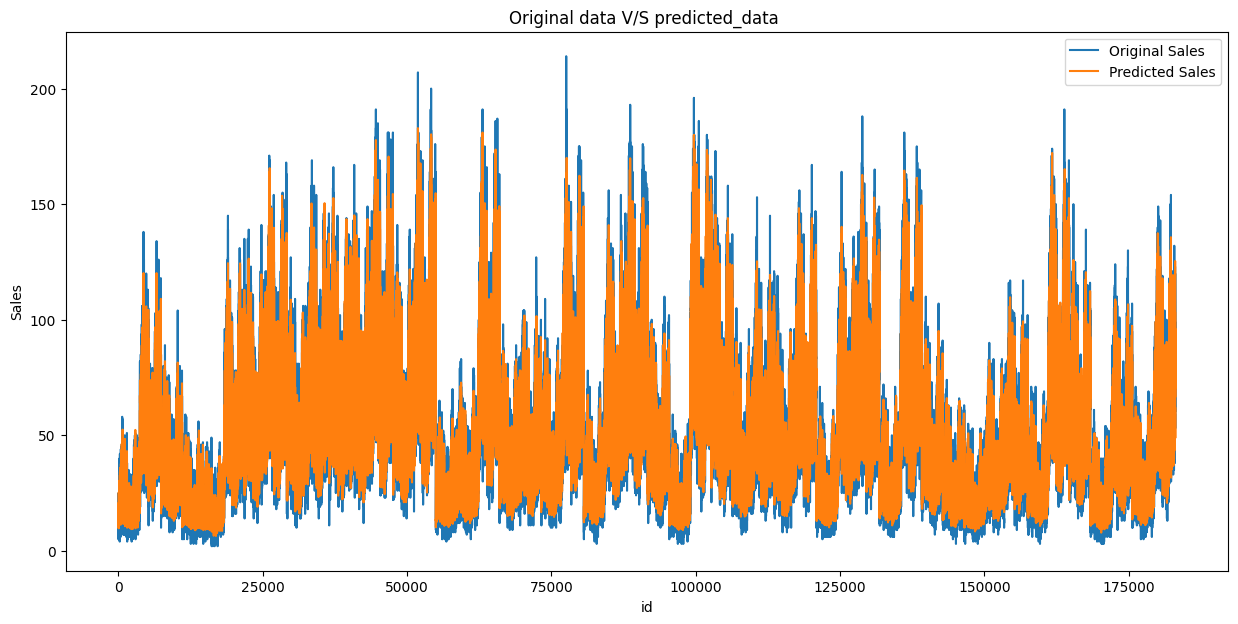

In [98]:
# Plotting Original data V/S predicted_data
plt.figure(figsize=(15,7))
plt.plot(result_sales['original_data'])
plt.plot(result_sales['predicted_data'])
plt.title("Original data V/S predicted_data ")
plt.xlabel("id")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()

### Predictid data and original data are so close that means our model is perfect
### Now, we can use our model to make prediction on new data:

# <span style="color:brown"><ins>Making Predictions</ins></span>

In [59]:
#Prediction : 
#date features :
test['dayofmonth'] = test.date.dt.day
test['dayofyear'] = test.date.dt.dayofyear
test['dayofweek'] = test.date.dt.dayofweek
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year
test['weekofyear'] = test.date.dt.weekofyear
#test.drop('date',axis=1,inplace=True)
test.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_26576\3815917901.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['weekofyear'] = test.date.dt.weekofyear


,id,date,store,item,dayofmonth,dayofyear,dayofweek,month,year,weekofyear
0,0,2018-01-01,1,1,1,1,0,1,2018,1
1,1,2018-01-02,1,1,2,2,1,1,2018,1
2,2,2018-01-03,1,1,3,3,2,1,2018,1
3,3,2018-01-04,1,1,4,4,3,1,2018,1
4,4,2018-01-05,1,1,5,5,4,1,2018,1


In [60]:
# data features
df_test = pd.get_dummies(test, columns = ['store','item','dayofmonth','dayofweek','month','weekofyear'])
# drop id and date column
df_test.drop('id',axis=1,inplace=True)
df_test.drop('date',axis=1,inplace=True)

In [100]:
# Checkin df_test data
df_test

,dayofyear,year,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,...,weekofyear_4,weekofyear_5,weekofyear_6,weekofyear_7,weekofyear_8,weekofyear_9,weekofyear_10,weekofyear_11,weekofyear_12,weekofyear_13
0,1,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2018,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,86,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44996,87,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44997,88,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44998,89,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Predict sales test data of 3 first month of year 2018
X_prediction = df_test.values
predictions = gbm.predict(X_prediction, predict_disable_shape_check=True)

In [99]:
# Checking Prediction Values
predictions

array([12.52024849, 14.47376024, 14.44383206, ..., 74.23267133,
       79.09656722, 83.35355269])

In [63]:
# Create new data with column id from test data and sales from prediction values
pred_2018 = test.loc[:,['id']]
pred_2018['sales']= predictions
pred_2018

,id,sales
0,0,12.520248
1,1,14.473760
2,2,14.443832
3,3,15.376787
4,4,17.155879
...,...,...
44995,44995,68.205506
44996,44996,69.581005
44997,44997,74.232671
44998,44998,79.096567


In [102]:
# Showing sales of new data 
df_sales_pred = pd.merge(test,pred_2018,on='id')
df_sales_pred

,id,date,store,item,dayofmonth,dayofyear,dayofweek,month,year,weekofyear,sales
0,0,2018-01-01,1,1,1,1,0,1,2018,1,12.520248
1,1,2018-01-02,1,1,2,2,1,1,2018,1,14.473760
2,2,2018-01-03,1,1,3,3,2,1,2018,1,14.443832
3,3,2018-01-04,1,1,4,4,3,1,2018,1,15.376787
4,4,2018-01-05,1,1,5,5,4,1,2018,1,17.155879
...,...,...,...,...,...,...,...,...,...,...,...
44995,44995,2018-03-27,10,50,27,86,1,3,2018,13,68.205506
44996,44996,2018-03-28,10,50,28,87,2,3,2018,13,69.581005
44997,44997,2018-03-29,10,50,29,88,3,3,2018,13,74.232671
44998,44998,2018-03-30,10,50,30,89,4,3,2018,13,79.096567


# <span style="color:brown"><ins>Exporting the model</ins></span>

In [105]:
import joblib
joblib.dump(gbm, "model.pkl")

['model.pkl']